In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
pc_passengercar = pd.read_excel('trafikanalys_1810_English.xlsx', sheet_name='passenger car')
pc_passengernewcarreg = pd.read_excel('trafikanalys_1810_English.xlsx', sheet_name='passenger car new reg')
pc_fueltype = pd.read_excel('trafikanalys_1810_English.xlsx', sheet_name='Passenger cars came in fuel')
pc_emissionclass = pd.read_excel('trafikanalys_1810_English.xlsx', sheet_name='Passenger cars Emission class')
truck = pd.read_excel('trafikanalys_1810_English.xlsx', sheet_name='Truck')
truck_emissionclass = pd.read_excel('trafikanalys_1810_English.xlsx', sheet_name='Truck Emission Class')
Bus = pd.read_excel('trafikanalys_1810_English.xlsx', sheet_name='Bus')
MC_Moped = pd.read_excel('trafikanalys_1810_English.xlsx', sheet_name='MC and moped')
Traktor = pd.read_excel('trafikanalys_1810_English.xlsx', sheet_name='Traktor')
Trailer = pd.read_excel('trafikanalys_1810_English.xlsx', sheet_name='Trailer')
Terrain_scooters = pd.read_excel('trafikanalys_1810_English.xlsx', sheet_name='Terrain scooters')

###### Since the data source was originally in Swedish and was not formatted enough for easy analysis on pandas. The contents have been moved to a new sheet and converted to English for globally understanding. 

Each of the sheets in the excel have been imported into separated dataframes, bearing respective names for easier understanding. Dataframe name decriptions provided below.

         1) pc_passengercar - passenger car information
         2) pc_passengernewcarreg - data consisting of passenger car new registrations over a period of 12 years.
         pc is used in the beginning so that later dataframes related to passenger cars can be suffixed with pc helping to build a relationship
         3) pc_fueltype - fuel type distribution of passenger cars
         4) pc_emissionclass - emission type distribution of passenger cars
         5) truck - data containing information about truck used and unused distributed by weight over 12 years
         6) truck_emissionclass - truck emission class patterns
         7) Bus - data containing information about bus used and unused, registered and unregistered over 12 years
         8) MC_Moped - data containing Moped and motorcycle used and unused, registration and deregistration over 12 years
         9) Traktor - data containing information about Traktor used and unused, registered and unregistered over 12 years
         10)Trailer - data containing information about Trailers used and unused, registered and unregistered over 12 years
         11)Terrain_scooters - data containing information about Terrain scooters used and unused, registered and unregistered over 12 years

##### Note: If you find that the visuals and their texts are way too small in this notebook. Just double click on the visual and it will enlarge. You can scroll in all four directions to get a detailed view of the visualization. 

### Cars

###### The cars data will be analysed with specific features like if they are "in use" and "not in use", also if the new registrations and deregistrations. Then we will finally look at the cars used by fuel types and emission class. This should give us a complete idea the patterns of usage and if there have been any changes in the past few months.

In [28]:
pc_passengercar.head()

,Year,Month,In_use,Not_in_use,Total,New_Registrations,Campers,Totally_from_the_year_beginning,Total_Deregistrations,Total_Deregistrations_from_year_beginning,Scrapped_cars(administrative_scraped),Scrapped_cars(real_trashed_during_the_period),Scrapped_cars(Sum_Thrashed),Scrapped_cars(Totally_from_the_year_beginning),Exported_registered_passenger_cars
0,2006,januari,4141488,868863,5010351,19173,2.0,19173,21084,21084,569,18906,19475,19475,1609
1,2006,februari,4141616,871674,5013290,20326,2.0,39499,17112,38196,434,15636,16070,35545,1042
2,2006,mars,4153865,866919,5020784,28007,4.0,67506,20386,58582,587,18332,18919,54464,1467
3,2006,april,4197629,832062,5029691,28751,22.0,96257,19639,78221,405,17863,18268,72732,1371
4,2006,maj,4234474,801103,5035577,32556,271.0,128813,26584,104805,471,24666,25137,97869,1447


In [4]:
pc_passengercar.shape

(154, 15)

In [5]:
pc_passengercar.describe()

,Year,In_use,Not_in_use,Total,New_Registrations,Campers,Totally_from_the_year_beginning,Total_Deregistrations,Total_Deregistrations_from_year_beginning,Scrapped_cars(administrative_scraped),Scrapped_cars(real_trashed_during_the_period),Scrapped_cars(Sum_Thrashed),Scrapped_cars(Totally_from_the_year_beginning),Exported_registered_passenger_cars
count,154.000000,1.540000e+02,1.540000e+02,1.540000e+02,154.000000,152.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,2011.922078,4.527710e+06,1.019565e+06,5.547276e+06,27068.850649,423.750000,170397.285714,19355.675325,120623.071429,1273.259740,14912.857143,16186.116883,101498.038961,3186.350649
std,3.714540,2.374177e+05,1.464023e+05,3.621161e+05,6475.241724,387.594624,99053.661338,7147.251544,71667.680988,5133.618013,4680.317673,6964.037910,62514.987722,2114.085957
min,2006.000000,4.141488e+06,7.268680e+05,5.010351e+06,12371.000000,2.000000,12371.000000,10264.000000,10958.000000,372.000000,7750.000000,8349.000000,8349.000000,1042.000000
25%,2009.000000,4.330926e+06,8.959890e+05,5.241812e+06,22824.500000,163.000000,86984.750000,15803.000000,59431.250000,490.000000,12639.500000,13299.000000,47741.250000,2069.250000
50%,2012.000000,4.483936e+06,1.017784e+06,5.557512e+06,27054.500000,292.500000,169689.000000,18229.000000,117378.500000,550.500000,14564.500000,15358.500000,95917.000000,2509.000000
75%,2015.000000,4.697947e+06,1.127714e+06,5.798028e+06,30783.250000,625.000000,246843.000000,20369.000000,174930.250000,723.250000,15830.250000,16731.750000,148414.750000,3479.250000
max,2018.000000,5.051966e+06,1.334862e+06,6.255161e+06,67553.000000,3364.000000,392728.000000,72801.000000,299606.000000,56193.000000,52133.000000,71005.000000,274665.000000,16053.000000


In [6]:
pc_passengercar.dtypes

Year                                                int64
Month                                              object
In_use                                              int64
Not_in_use                                          int64
Total                                               int64
New_Registrations                                   int64
Campers                                           float64
Totally_from_the_year_beginning                     int64
Total_Deregistrations                               int64
Total_Deregistrations_from_year_beginning           int64
Scrapped_cars(administrative_scraped)               int64
Scrapped_cars(real_trashed_during_the_period)       int64
Scrapped_cars(Sum_Thrashed)                         int64
Scrapped_cars(Totally_from_the_year_beginning)      int64
Exported_registered_passenger_cars                  int64
dtype: object

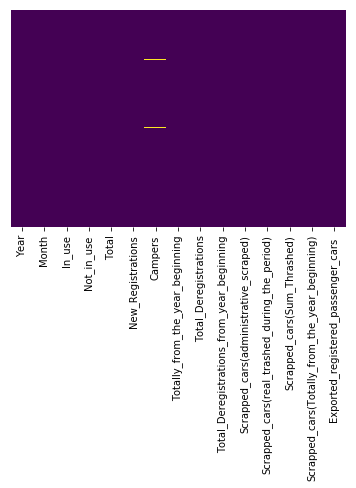

In [7]:
sns.heatmap(pc_passengercar.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [8]:
pc_passengercar.fillna(method='pad',inplace=True)

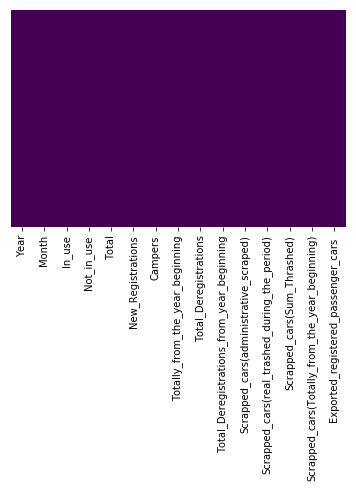

In [9]:
sns.heatmap(pc_passengercar.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

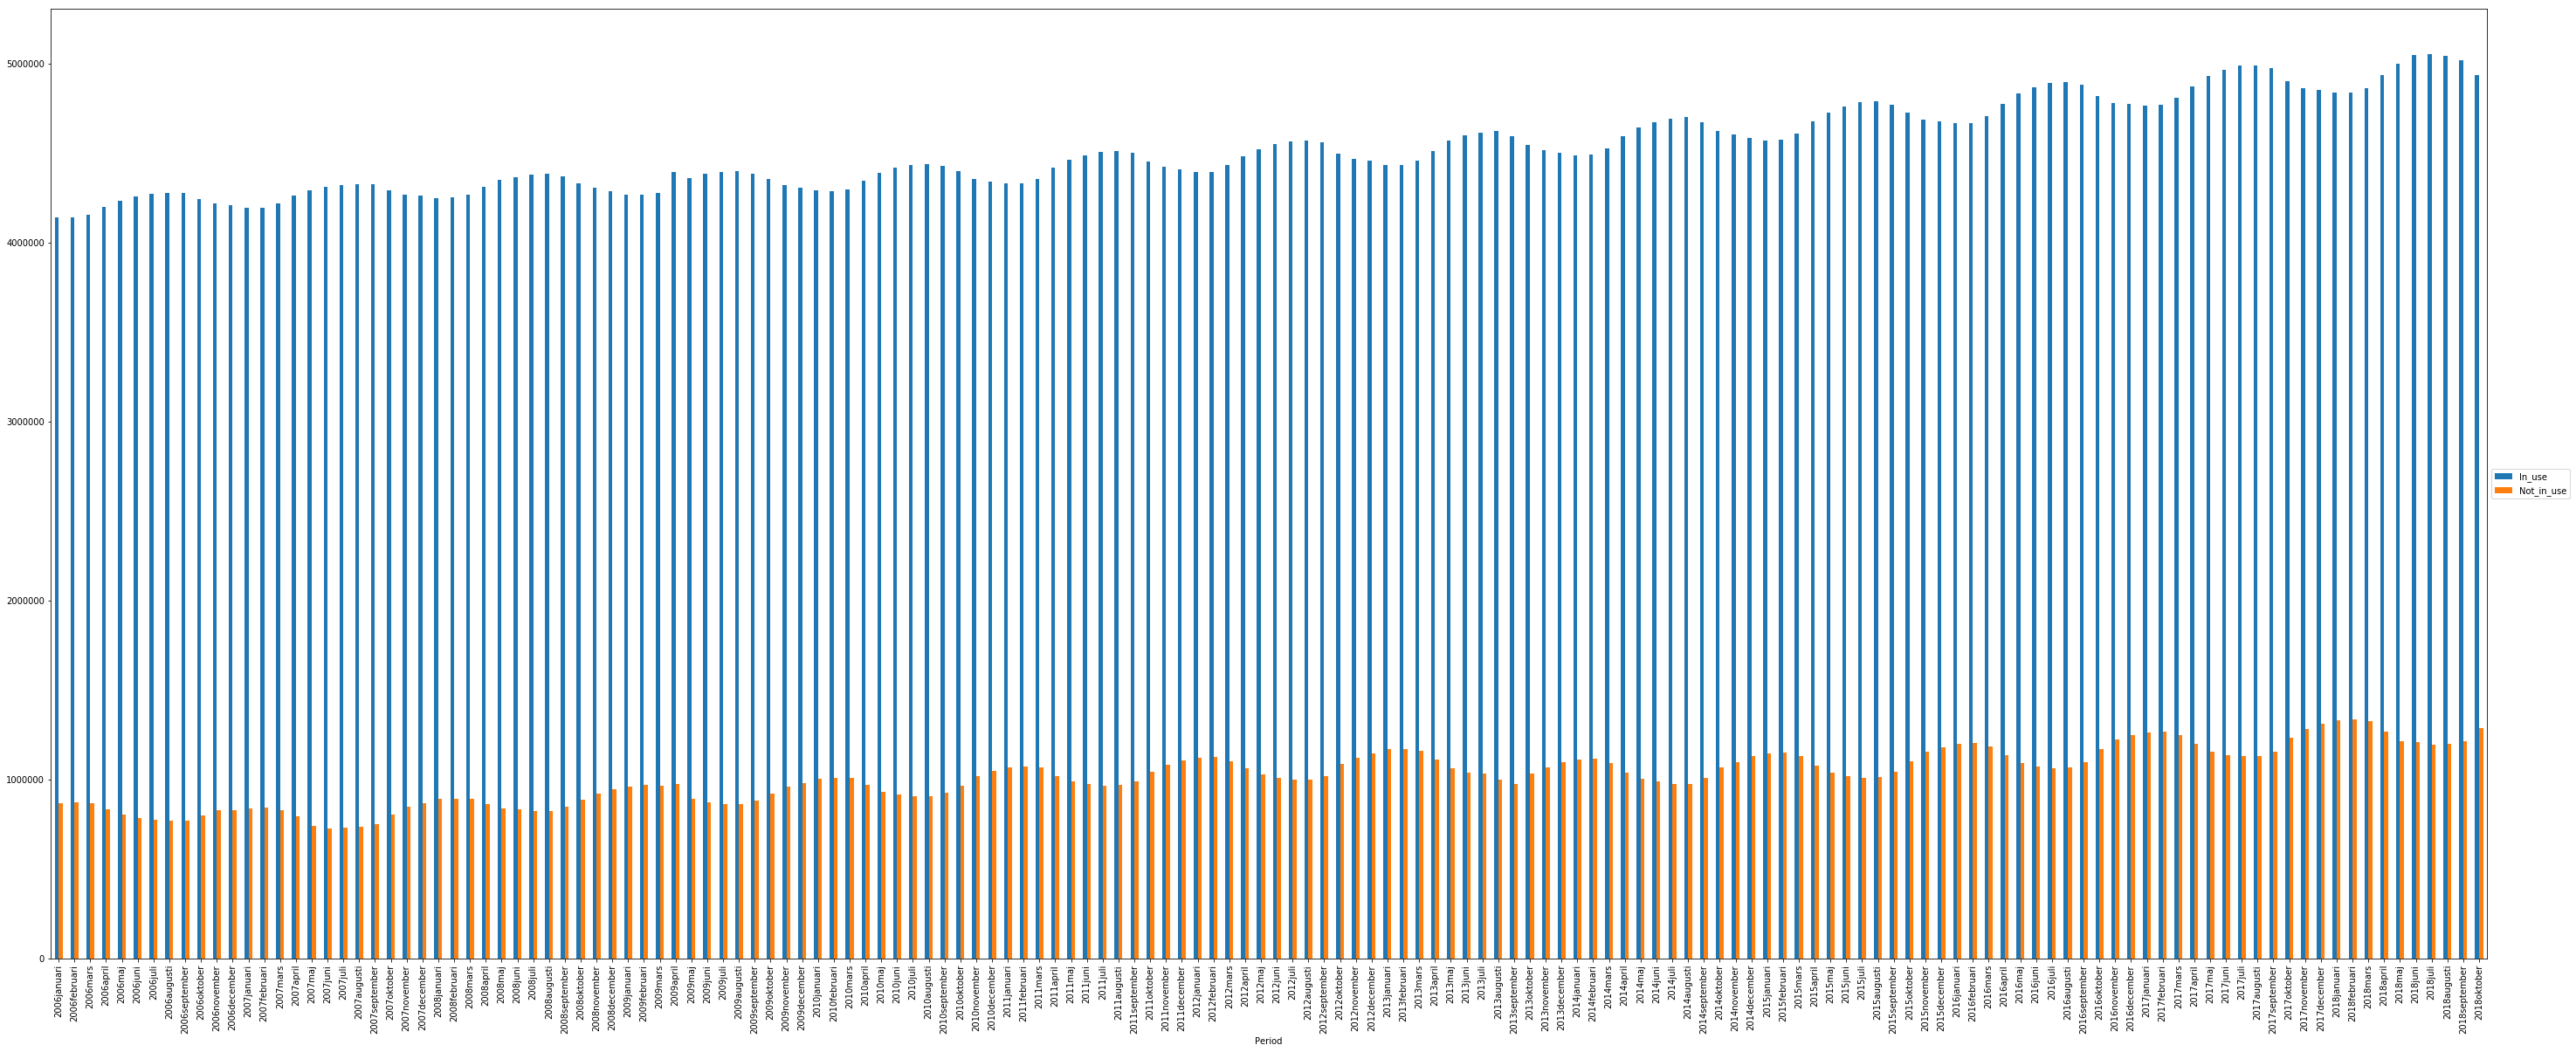

In [14]:
pc_passengercar_sub = pd.DataFrame(data=pc_passengercar,columns=['Year','Month','In_use','Not_in_use'])
pc_passengercar_sub['Period'] = pc_passengercar_sub.Year.astype(str).str.cat(pc_passengercar_sub.Month)
pc_passengercar_sub.drop(labels=['Year','Month'],inplace=True,axis=1)
plt.rcParams["figure.figsize"] = [50, 20]
pc_passengercar_sub.plot.bar(x='Period')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [315]:
pc_passengercar_year = pc_passengercar.groupby('Year').aggregate('sum')

In [317]:
pc_passengercar_sub.to_csv('personbil.csv',sep=',')
pc_passengercar_year.to_csv('personbil_year.csv',sep=',')

[Text(0,0,'In_use'),
 Text(0,0,'Not_in_use'),
 Text(0,0,'Total'),
 Text(0,0,'New_Registrations'),
 Text(0,0,'Campers'),
 Text(0,0,'Totally_from_the_year_beginning'),
 Text(0,0,'Total_Deregistrations'),
 Text(0,0,'Total_Deregistrations_from_year_beginning'),
 Text(0,0,'Scrapped_cars(administrative_scraped)'),
 Text(0,0,'Scrapped_cars(real_trashed_during_the_period)'),
 Text(0,0,'Scrapped_cars(Sum_Thrashed)'),
 Text(0,0,'Scrapped_cars(Totally_from_the_year_beginning)'),
 Text(0,0,'Exported_registered_passenger_cars ')]

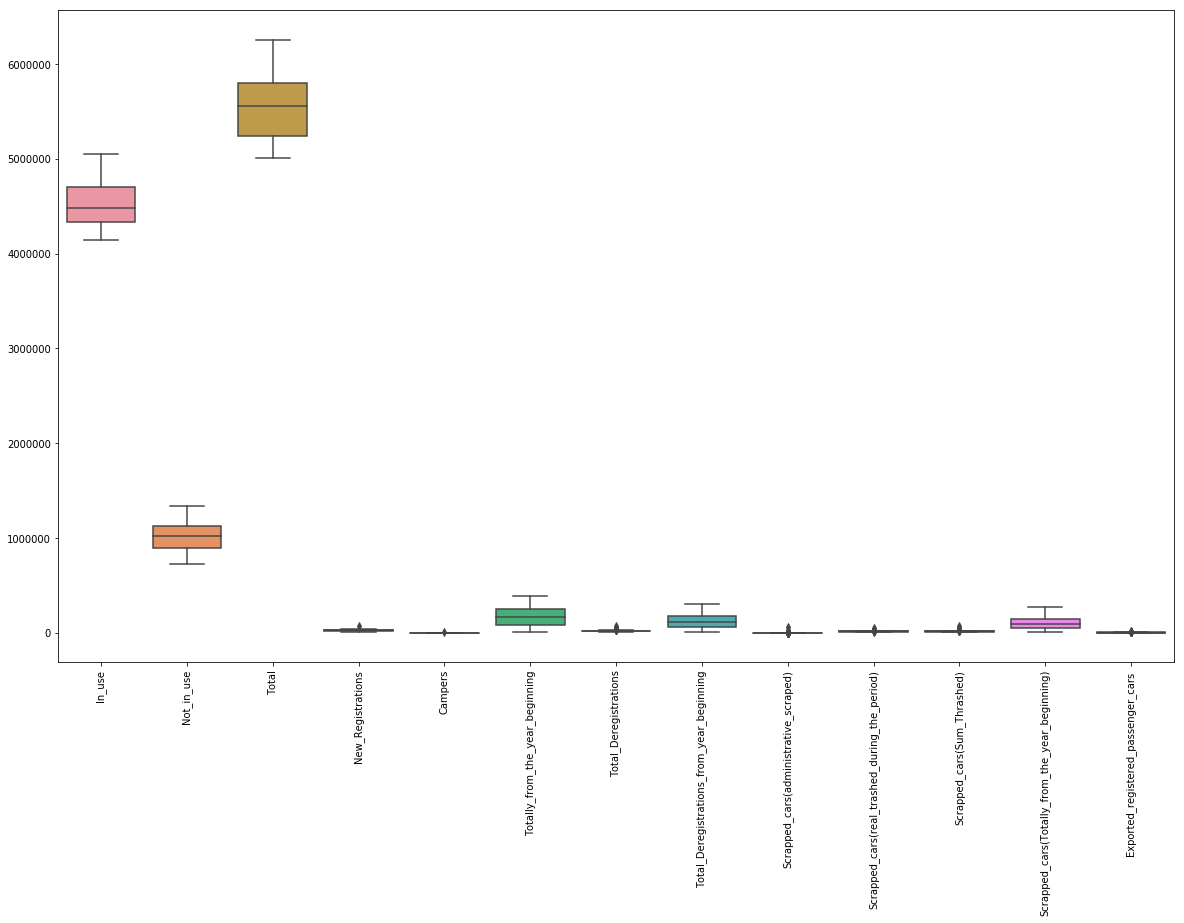

In [29]:
pc_passengercar_box = pc_passengercar.drop(['Year','Month'],axis=1)
a4_dims = (20, 12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(data=pc_passengercar_box,orient='v')
ax.set_xticklabels(['In_use', 'Not_in_use', 'Total', 'New_Registrations', 'Campers', 'Totally_from_the_year_beginning', 'Total_Deregistrations', 'Total_Deregistrations_from_year_beginning','Scrapped_cars(administrative_scraped)', 'Scrapped_cars(real_trashed_during_the_period)','Scrapped_cars(Sum_Thrashed)','Scrapped_cars(Totally_from_the_year_beginning)','Exported_registered_passenger_cars '],rotation=90)

There are no outliers identified in the dataset for cars.

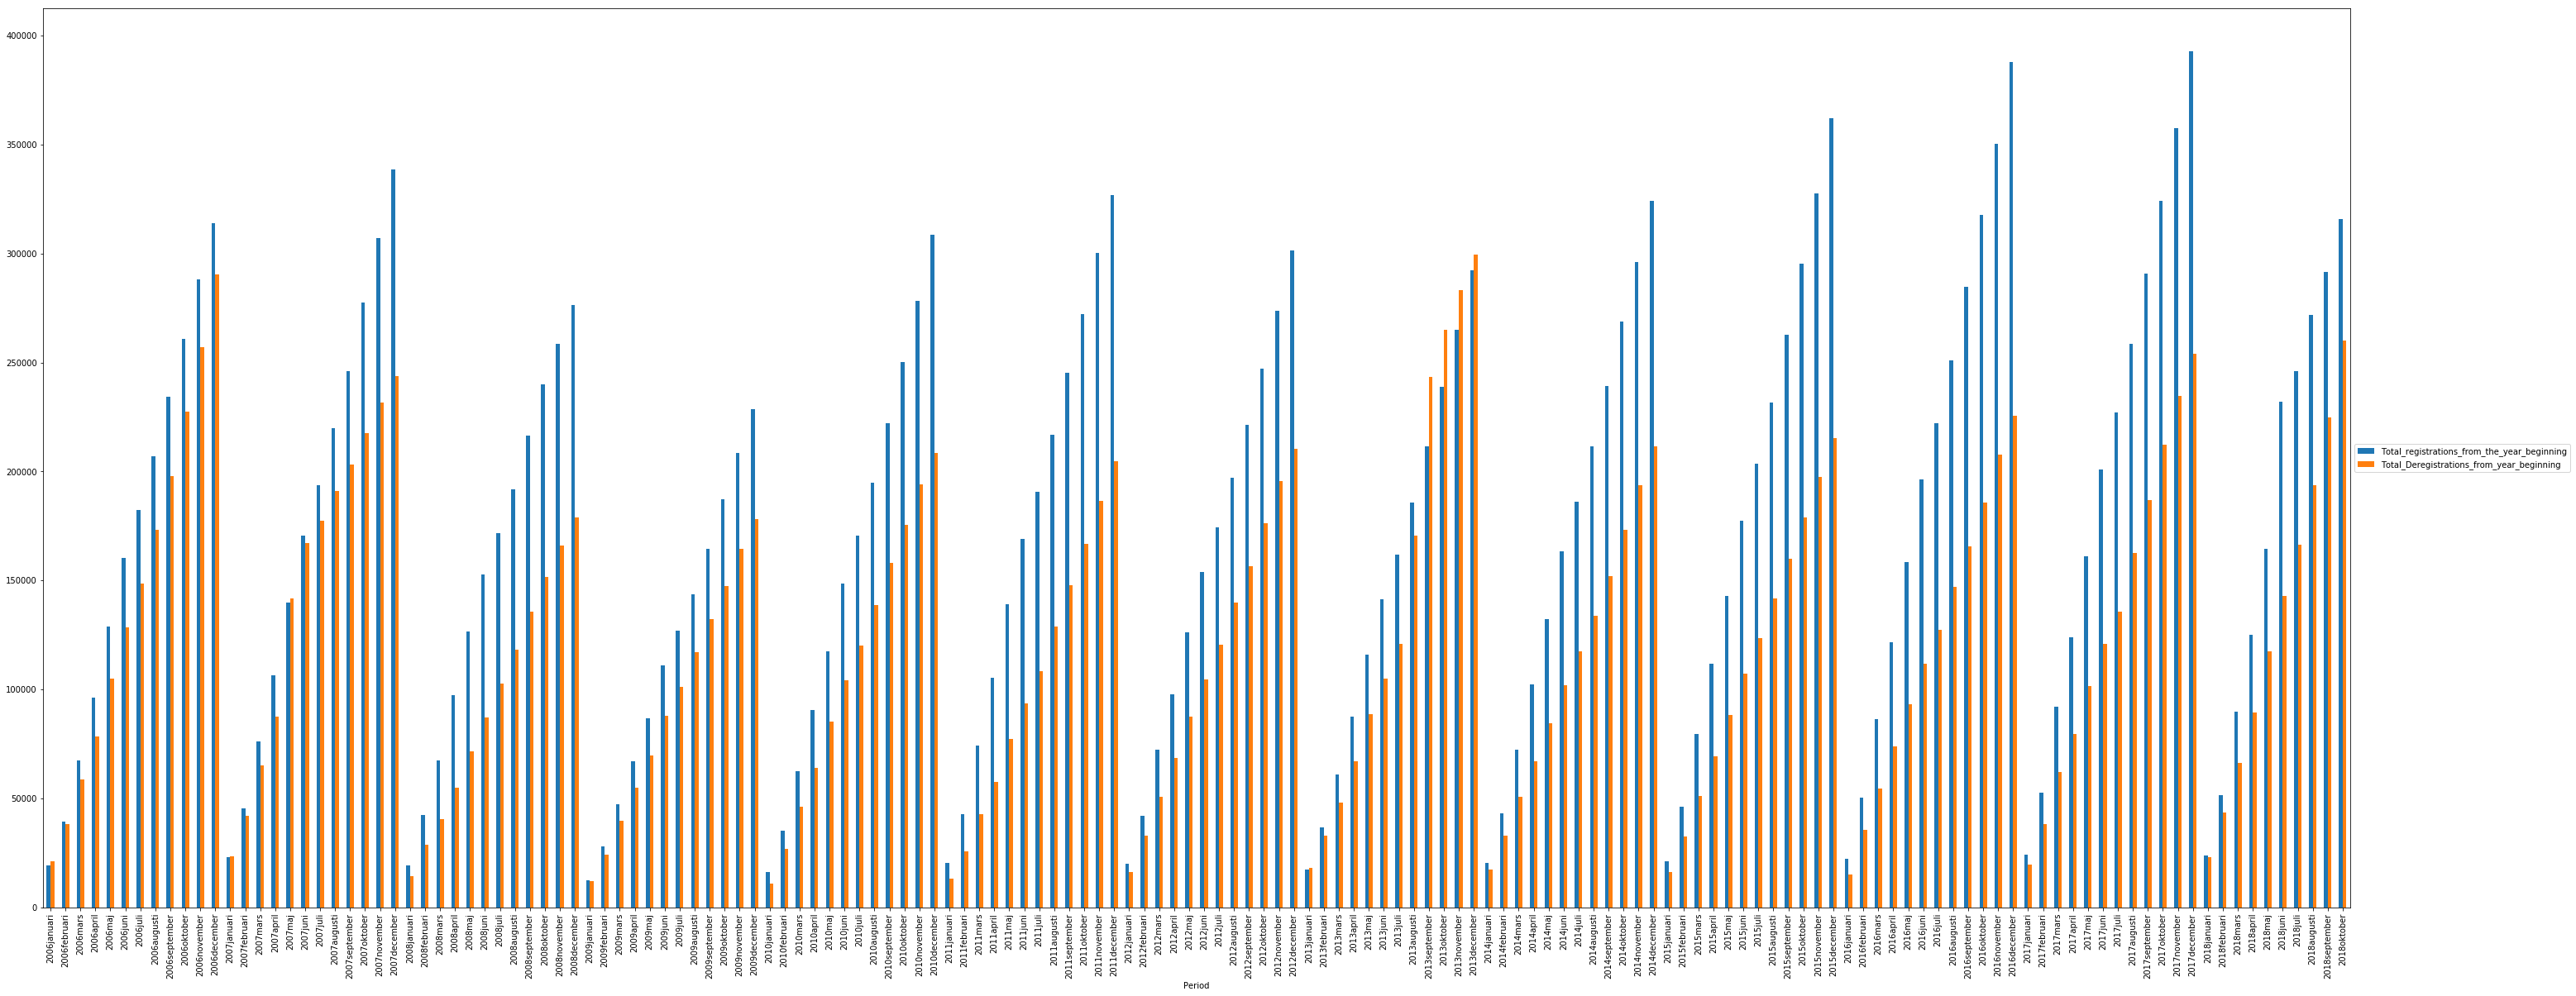

In [205]:
pc_passengercar_sub1 = pd.DataFrame(data=pc_passengercar,columns=['Year','Month','Totally_from_the_year_beginning','Total_Deregistrations_from_year_beginning'])
pc_passengercar_sub1.rename(columns={"Totally_from_the_year_beginning": "Total_registrations_from_the_year_beginning"},inplace=True)
pc_passengercar_sub1['Period'] = pc_passengercar_sub1.Year.astype(str).str.cat(pc_passengercar_sub1.Month)
pc_passengercar_sub1.drop(labels=['Year','Month'],inplace=True,axis=1)
plt.rcParams["figure.figsize"] = [50, 20]
pc_passengercar_sub1.plot.bar(x='Period')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [209]:
pc_passengercar_sub1.to_csv('personbil_reginfo.csv',sep=',')

[Text(0,0,'Petrol'),
 Text(0,0,'Diesel'),
 Text(0,0,'Eletricity'),
 Text(0,0,'Electric hybrids'),
 Text(0,0,'Plug-in_hybrids'),
 Text(0,0,'Ethanol'),
 Text(0,0,'Gas'),
 Text(0,0,'Others'),
 Text(0,0,'Total')]

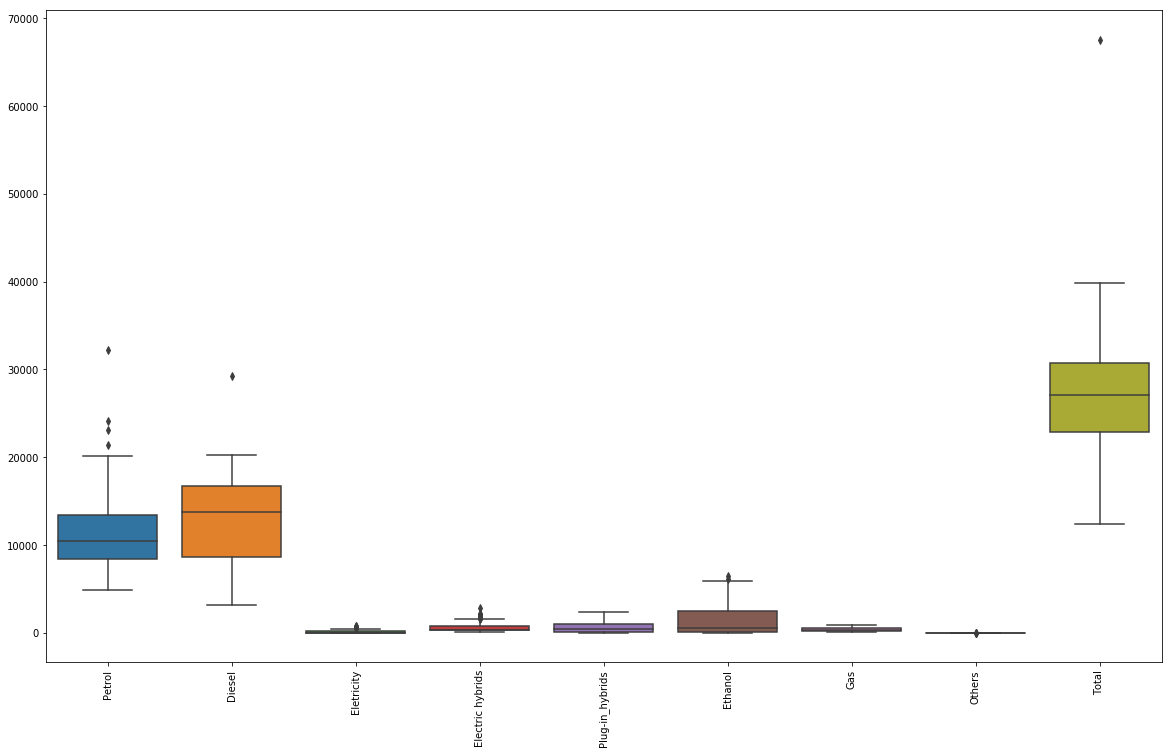

In [31]:
pc_passengercarreg_box = pc_passengernewcarreg.drop(['Year','Month'],axis=1)
a4_dims = (20, 12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(data=pc_passengercarreg_box,orient='v')
ax.set_xticklabels(['Petrol', 'Diesel', 'Eletricity', 'Electric hybrids', 'Plug-in_hybrids', 'Ethanol', 'Gas', 'Others', 'Total'],rotation=90)

In [32]:
pc_passengernewcarreg.describe()

,Year,Petrol,Diesel,Eletricity,Electric hybrids,Plug-in_hybrids,Ethanol,Gas,Others,Total
count,154.000000,154.000000,154.000000,154.000000,154.000000,82.000000,154.000000,154.000000,154.000000,154.000000
mean,2011.922078,11209.168831,12923.714286,112.480519,612.597403,678.414634,1478.370130,368.772727,2.448052,27068.785714
std,3.714540,4176.924408,4816.379214,170.019231,530.358967,667.077317,1637.170906,175.414226,2.169432,6475.265917
min,2006.000000,4872.000000,3155.000000,0.000000,109.000000,0.000000,24.000000,47.000000,0.000000,12371.000000
25%,2009.000000,8382.000000,8673.250000,0.250000,264.750000,111.750000,123.500000,237.250000,1.000000,22824.500000
50%,2012.000000,10405.500000,13732.000000,23.500000,364.000000,388.000000,536.000000,355.000000,2.000000,27054.500000
75%,2015.000000,13403.250000,16764.000000,191.000000,801.250000,1023.750000,2501.250000,500.750000,4.000000,30783.250000
max,2018.000000,32231.000000,29301.000000,806.000000,2842.000000,2381.000000,6431.000000,872.000000,10.000000,67553.000000


The passenger car new registration dataset does show some mathematical outliers. The maximum value for the Petrol column allowed is 20935.125 according to the standard calculation of 1.5  above and below in the IQR. The minimum is 850.125. But according to the below reference. Let us try to be more realistic since the 1.5 doesnt hold good for most cases. We consider 2.2. After calculation we still see the max value for Petrol is an outlier. [13403.25 + ((13403.25 - 8382) * 2.2) = 24450.0]. The maximum could have been 24450.0 but the value recorded for Petrol in June 2018 is 32231. But for Diesel it could have been 34563.65 but the max value is 29301. Hence need not be an outlier. 

Below is a reference that I use as of now. 

Hoaglin, D. C., and Iglewicz, B. (1987), Fine tuning some resistant rules for outlier labeling, Journal of American Statistical Association, 82, 1147-1149.
      *** Demonstrate that the 1.5 multiplier was inaccurate approximately 50% of the time; suggested that 2.2 is probably more valid in a lot of applied cases.

In [210]:
pc_passengernewcarreg['Petrol'].quantile(q=0.99)

23603.43

In [211]:
pc_passengernewcarreg['Petrol'].mean()

11158.642857142857

In [212]:
pc_passengernewcarreg.loc[pc_passengernewcarreg['Petrol'] > 23603.43, 'Petrol'] = 11158.64

In [213]:
pc_passengernewcarreg.describe()

,Year,Petrol,Diesel,Eletricity,Electric hybrids,Plug-in_hybrids,Ethanol,Gas,Others,Total,First Season
count,154.000000,154.000000,154.000000,154.000000,154.000000,82.000000,154.000000,154.000000,154.000000,154.000000,1.0
mean,2011.922078,10988.190130,12923.714286,112.480519,612.597403,678.414634,1478.370130,368.772727,2.448052,27068.785714,24450.0
std,3.714540,3663.367741,4816.379214,170.019231,530.358967,667.077317,1637.170906,175.414226,2.169432,6475.265917,NaN
min,2006.000000,4872.000000,3155.000000,0.000000,109.000000,0.000000,24.000000,47.000000,0.000000,12371.000000,24450.0
25%,2009.000000,8382.000000,8673.250000,0.250000,264.750000,111.750000,123.500000,237.250000,1.000000,22824.500000,24450.0
50%,2012.000000,10405.500000,13732.000000,23.500000,364.000000,388.000000,536.000000,355.000000,2.000000,27054.500000,24450.0
75%,2015.000000,13091.000000,16764.000000,191.000000,801.250000,1023.750000,2501.250000,500.750000,4.000000,30783.250000,24450.0
max,2018.000000,23148.000000,29301.000000,806.000000,2842.000000,2381.000000,6431.000000,872.000000,10.000000,67553.000000,24450.0


[Text(0,0,'Petrol'),
 Text(0,0,'Diesel'),
 Text(0,0,'Eletricity'),
 Text(0,0,'Electric hybrids'),
 Text(0,0,'Plug-in_hybrids'),
 Text(0,0,'Ethanol'),
 Text(0,0,'Gas'),
 Text(0,0,'Others'),
 Text(0,0,'Total')]

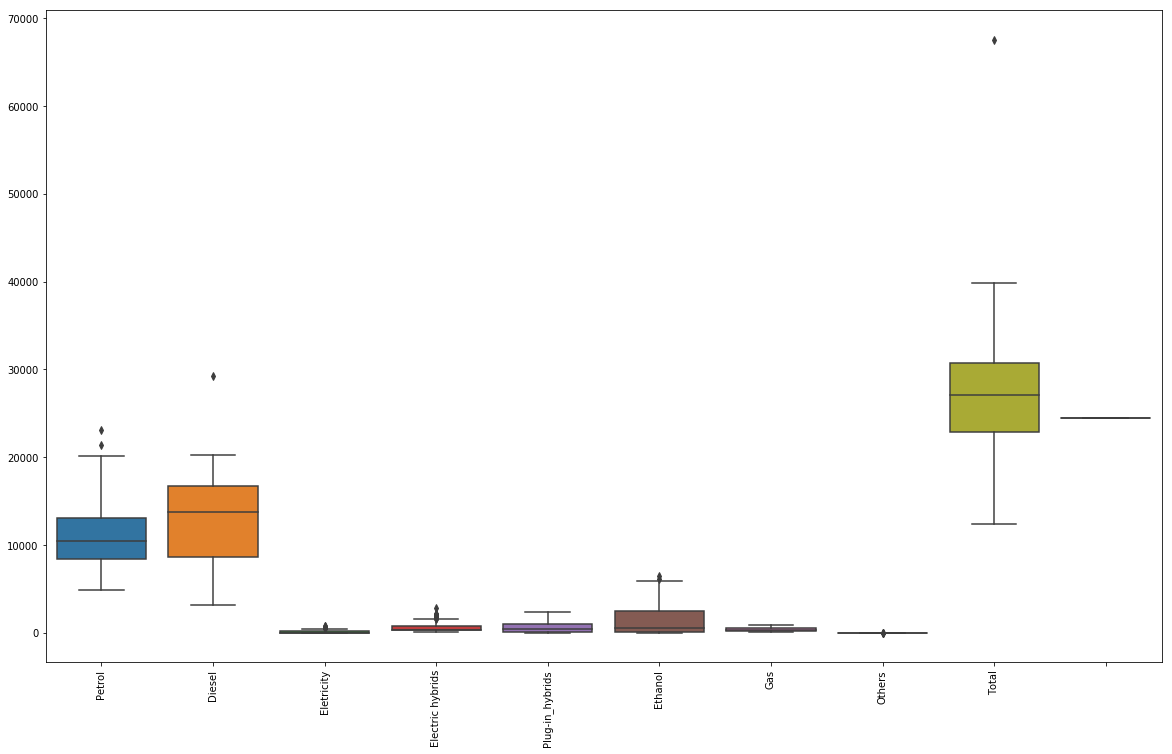

In [215]:
pc_passengercarreg_box = pc_passengernewcarreg.drop(['Year','Month'],axis=1)
a4_dims = (20, 12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(data=pc_passengercarreg_box,orient='v')
ax.set_xticklabels(['Petrol', 'Diesel', 'Eletricity', 'Electric hybrids', 'Plug-in_hybrids', 'Ethanol', 'Gas', 'Others', 'Total'],rotation=90)

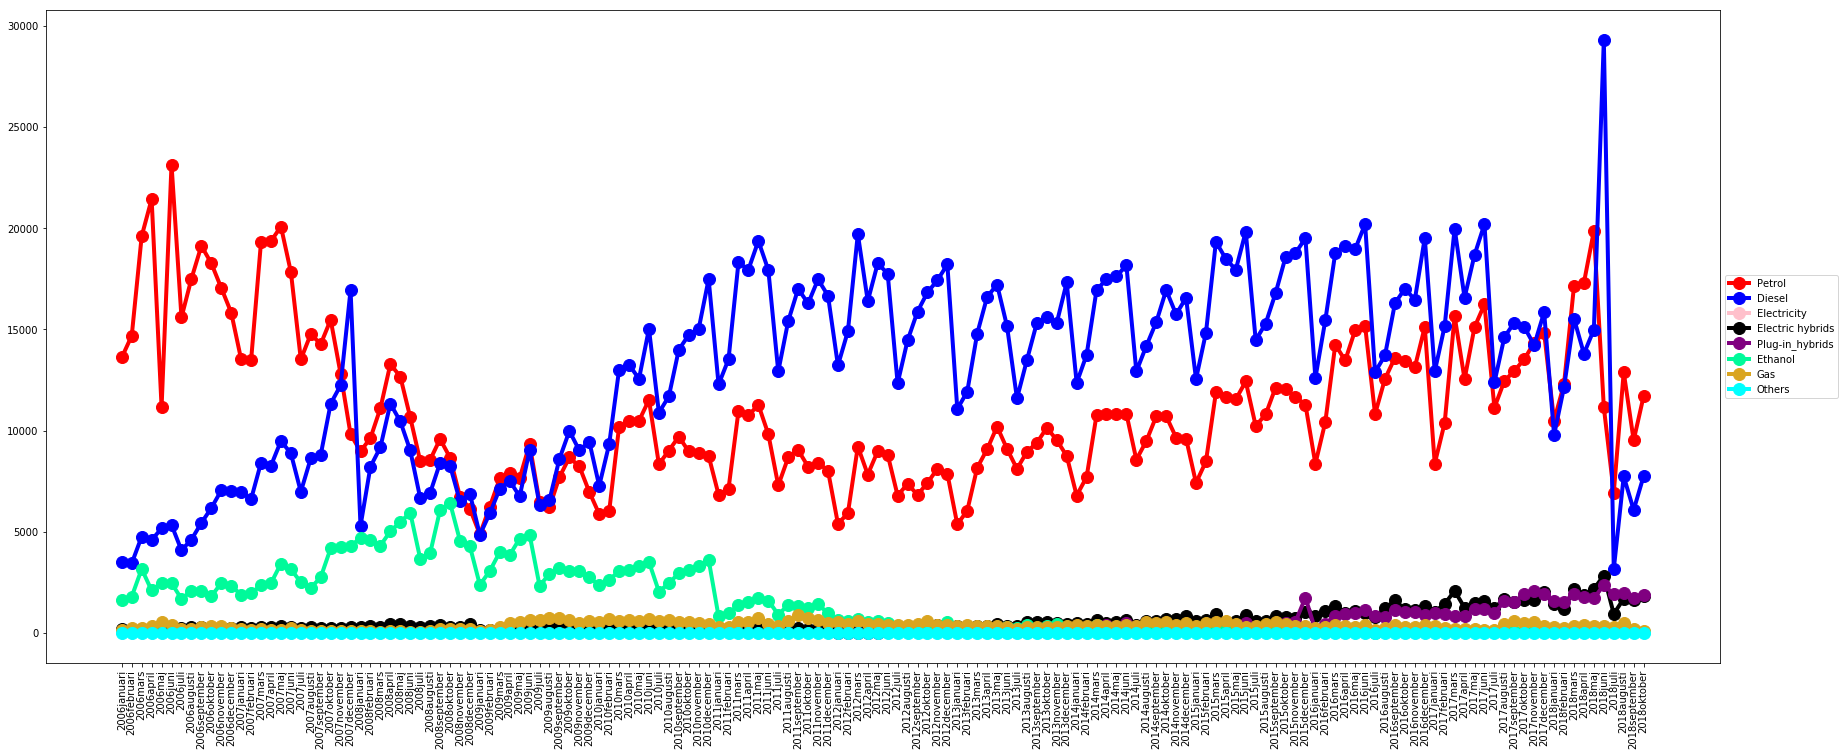

In [263]:
plt.plot( 'Period', 'Petrol', data=pc_passengernewcarreg_sub, marker='o', markerfacecolor='red', markersize=12, color='r', linewidth=4)
plt.plot( 'Period', 'Diesel', data=pc_passengernewcarreg_sub, marker='o', markerfacecolor='blue', markersize=12, color='b', linewidth=4)
plt.plot( 'Period', 'Electricity', data=pc_passengernewcarreg_sub, marker='o', markerfacecolor='pink', markersize=12, color='pink', linewidth=4)
plt.plot( 'Period', 'Electric hybrids', data=pc_passengernewcarreg_sub, marker='o', markerfacecolor='k', markersize=12, color='k', linewidth=4)
plt.plot( 'Period', 'Plug-in_hybrids', data=pc_passengernewcarreg_sub, marker='o', markerfacecolor='purple', markersize=12, color='purple', linewidth=4)
plt.plot( 'Period', 'Ethanol', data=pc_passengernewcarreg_sub, marker='o', markerfacecolor='mediumspringgreen', markersize=12, color='mediumspringgreen', linewidth=4)
plt.plot( 'Period', 'Gas', data=pc_passengernewcarreg_sub, marker='o', markerfacecolor='goldenrod', markersize=12, color='goldenrod', linewidth=4)
plt.plot( 'Period', 'Others', data=pc_passengernewcarreg_sub, marker='o', markerfacecolor='aqua', markersize=12, color='aqua', linewidth=4)
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [216]:
pc_passengernewcarreg_sub.to_csv('personbil_newreg.csv',sep=',')

In [331]:
pc_emissionclass.describe()

,Year,EEV,EL,ELHYBRID,LADDHYBRID,EURO 4,EURO 5,EURO 6,Missing,Total
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,2014.926829,1.597561,207.146341,879.585366,678.414634,265.231707,10000.719512,15130.146341,1812.621951,28975.463415
std,1.980027,2.433611,186.200550,580.326706,667.077317,175.422896,9715.754248,13622.197694,3295.381525,7048.151741
min,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,351.000000,13798.000000
25%,2013.000000,0.000000,47.000000,424.750000,111.750000,116.750000,346.500000,1384.250000,638.250000,24957.500000
50%,2015.000000,0.500000,169.500000,725.000000,388.000000,219.500000,5783.000000,14227.000000,900.000000,27913.500000
75%,2017.000000,2.000000,321.500000,1213.750000,1023.750000,392.250000,19403.750000,28156.250000,1263.750000,32642.000000
max,2018.000000,11.000000,802.000000,2809.000000,2381.000000,702.000000,25153.000000,60638.000000,19909.000000,67553.000000


[Text(0,0,'EEV'),
 Text(0,0,'EL'),
 Text(0,0,'ELHYBRID'),
 Text(0,0,'LADDHYBRID'),
 Text(0,0,'EURO 4'),
 Text(0,0,'EURO 5'),
 Text(0,0,'EURO 6'),
 Text(0,0,'Missing'),
 Text(0,0,'Total')]

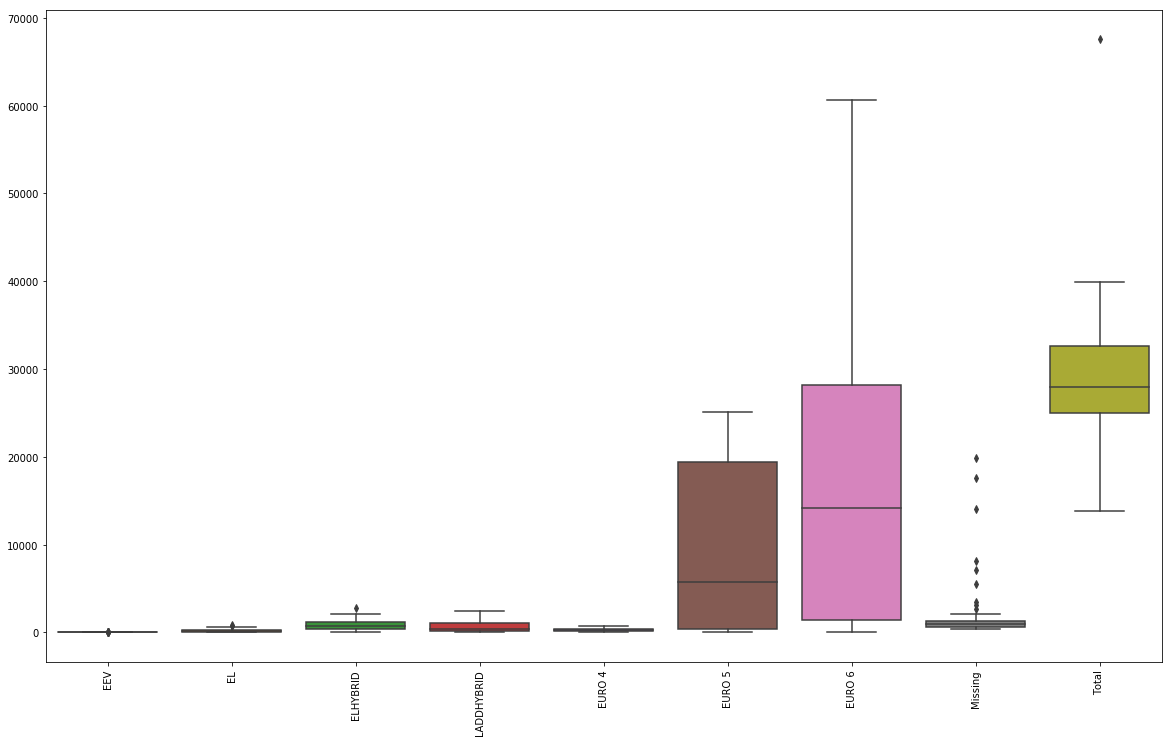

In [332]:
pc_emissionclass_box = pc_emissionclass.drop(['Year','Month'],axis=1)
a4_dims = (20, 12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(data=pc_emissionclass_box,orient='v')
ax.set_xticklabels(['EEV', 'EL', 'ELHYBRID', 'LADDHYBRID', 'EURO 4', 'EURO 5', 'EURO 6', 'Missing', 'Total'],rotation=90)

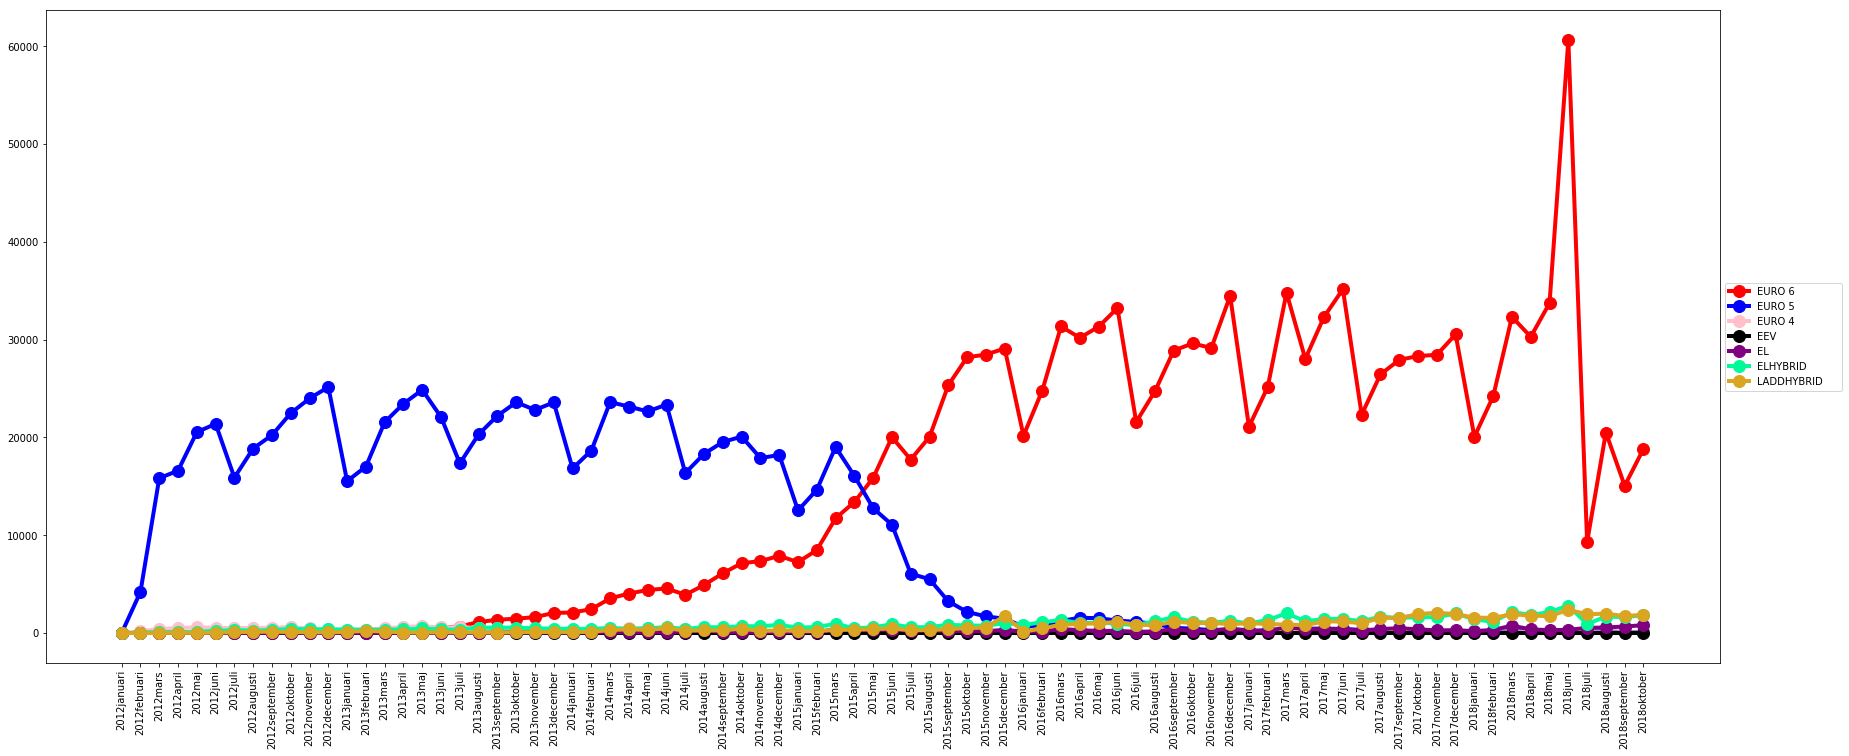

In [335]:
pc_emissionclass['Period'] = pc_emissionclass.Year.astype(str).str.cat(pc_emissionclass.Month)
plt.plot( 'Period', 'EURO 6         ', data=pc_emissionclass, marker='o', markerfacecolor='red', markersize=12, color='r', linewidth=4)
plt.plot( 'Period', 'EURO 5         ', data=pc_emissionclass, marker='o', markerfacecolor='blue', markersize=12, color='b', linewidth=4)
plt.plot( 'Period', 'EURO 4         ', data=pc_emissionclass, marker='o', markerfacecolor='pink', markersize=12, color='pink', linewidth=4)
plt.plot( 'Period', 'EEV            ', data=pc_emissionclass, marker='o', markerfacecolor='k', markersize=12, color='k', linewidth=4)
plt.plot( 'Period', 'EL             ', data=pc_emissionclass, marker='o', markerfacecolor='purple', markersize=12, color='purple', linewidth=4)
plt.plot( 'Period', 'ELHYBRID       ', data=pc_emissionclass, marker='o', markerfacecolor='mediumspringgreen', markersize=12, color='mediumspringgreen', linewidth=4)
plt.plot( 'Period', 'LADDHYBRID     ', data=pc_emissionclass, marker='o', markerfacecolor='goldenrod', markersize=12, color='goldenrod', linewidth=4)
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [336]:
pc_emissionclass_year = pc_emissionclass.groupby('Year').agg('sum')
pc_emissionclass.to_csv('pc_emissionclass.csv',sep=',')
pc_emissionclass_year.to_csv('pc_emissionclass_year.csv',sep=',')

### Truck

[Text(0,0,'In_use'),
 Text(0,0,'Not_in_use'),
 Text(0,0,'New registrations(Total_weight_in_kg(<3500))'),
 Text(0,0,'New_Registrations(Total_weight_in_kg(>3500))'),
 Text(0,0,'New_Registrations_Total'),
 Text(0,0,'Deregistrations')]

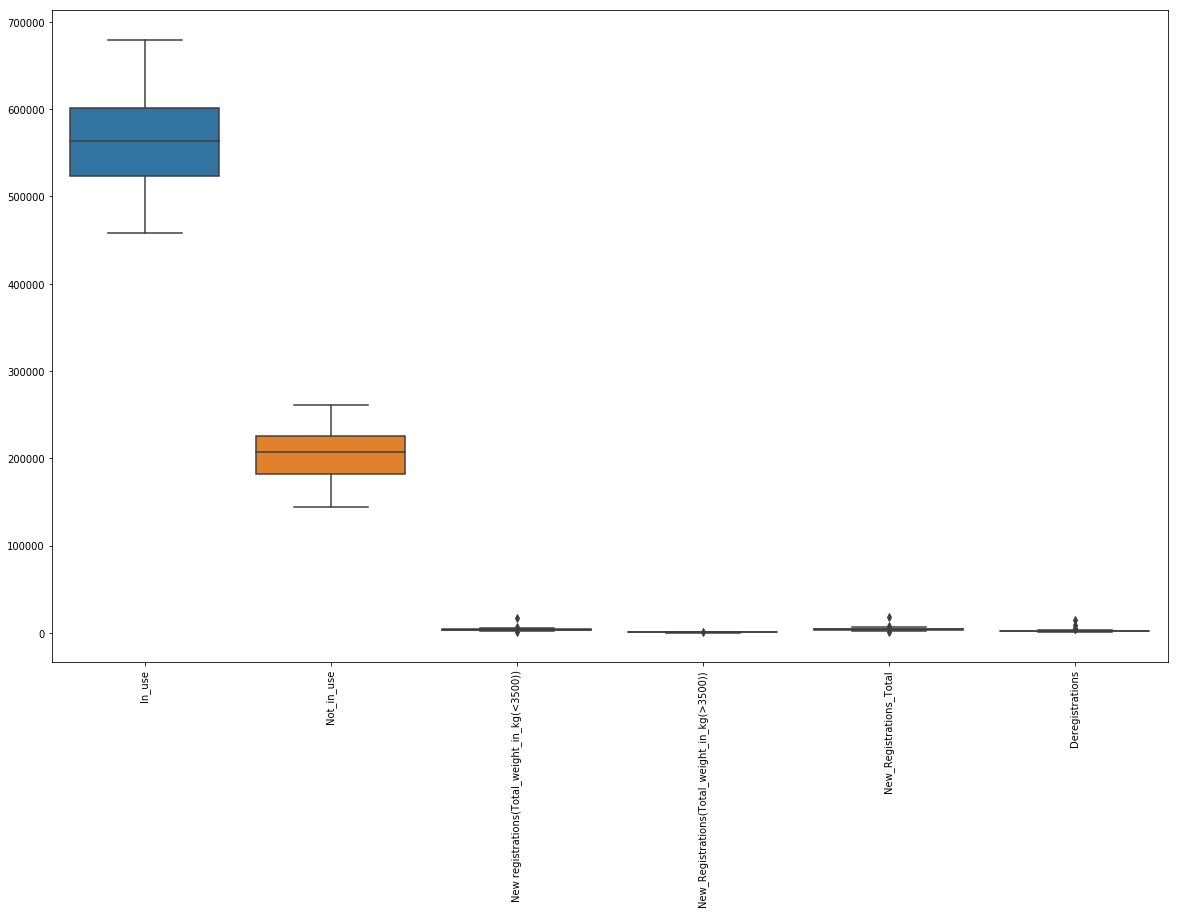

In [53]:
truck_box = truck.drop(['Year','Month'],axis=1)
a4_dims = (20, 12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(data=truck_box,orient='v')
ax.set_xticklabels(['In_use', 'Not_in_use', 'New registrations(Total_weight_in_kg(<3500))', 'New_Registrations(Total_weight_in_kg(>3500))', 'New_Registrations_Total', 'Deregistrations'],rotation=90)

The outliers shown on the new registrations for truck dataset can be ignored based on the hypothesis shown in the earlier tab. 

In [220]:
truck['Period'] = truck.Year.astype(str).str.cat(truck.Month)
truck.drop(['Year','Month'],axis=1, inplace=True)

In [221]:
truck.to_csv('truck.csv',sep=',')

In [225]:
truck_emissionclass.columns

Index(['Year', 'Month', 'EEV            ', 'EL             ',
       'ELHYBRID       ', 'EURO4         ', 'EURO5         ', 'EURO6         ',
       'Missing', 'Total'],
      dtype='object')

[Text(0,0,'EEV'),
 Text(0,0,'EL'),
 Text(0,0,'ELHYBRID'),
 Text(0,0,'EURO4'),
 Text(0,0,'EURO5'),
 Text(0,0,'EURO6'),
 Text(0,0,'Missing'),
 Text(0,0,'Total')]

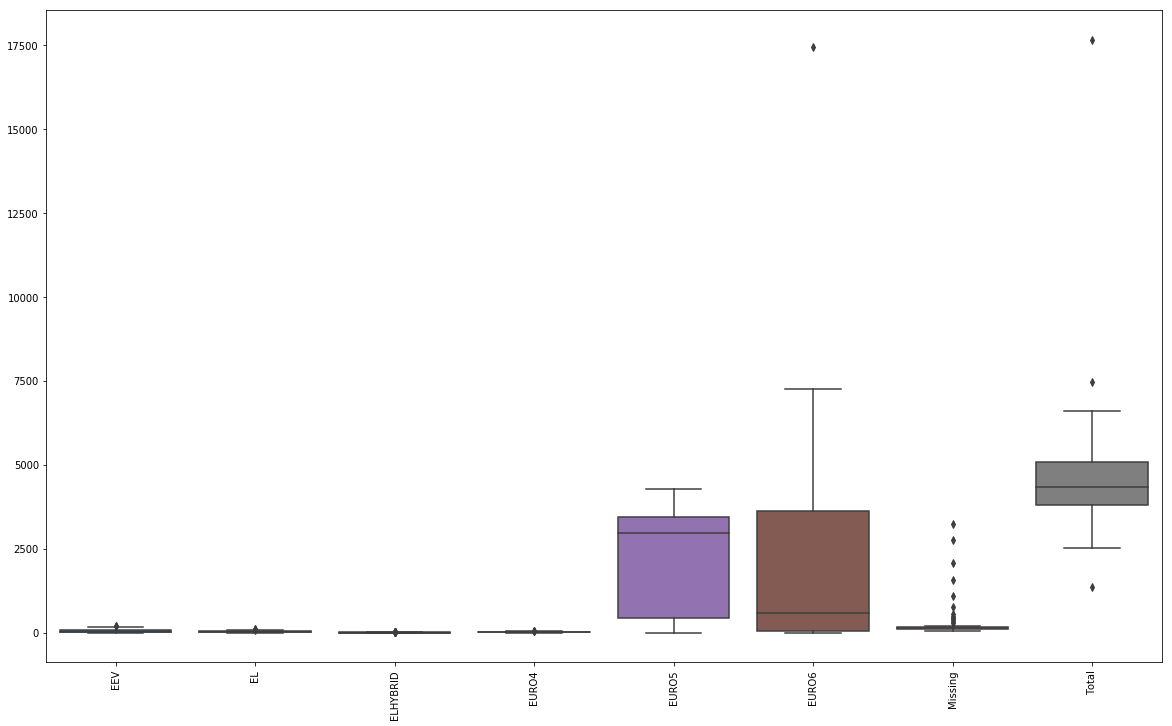

In [231]:
truck_emissionclass_box = truck_emissionclass.drop(['Year','Month'],axis=1)
a4_dims = (20, 12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(data=truck_emissionclass_box,orient='v')
ax.set_xticklabels(['EEV', 'EL','ELHYBRID', 'EURO4', 'EURO5', 'EURO6','Missing', 'Total'],rotation=90)

Euro 6 has a large outlier. The rest we will not be concerned for this analysis as we wont pick total and missing as they dont provide much value

In [338]:
truck_emissionclass['EURO6         '].quantile(q=0.90)

5470.0

In [339]:
truck_emissionclass.loc[truck_emissionclass['EURO6         '] > 5470.0, 'EURO6         '] = 5470.0

[Text(0,0,'EEV'),
 Text(0,0,'EL'),
 Text(0,0,'ELHYBRID'),
 Text(0,0,'EURO4'),
 Text(0,0,'EURO5'),
 Text(0,0,'EURO6'),
 Text(0,0,'Missing'),
 Text(0,0,'Total')]

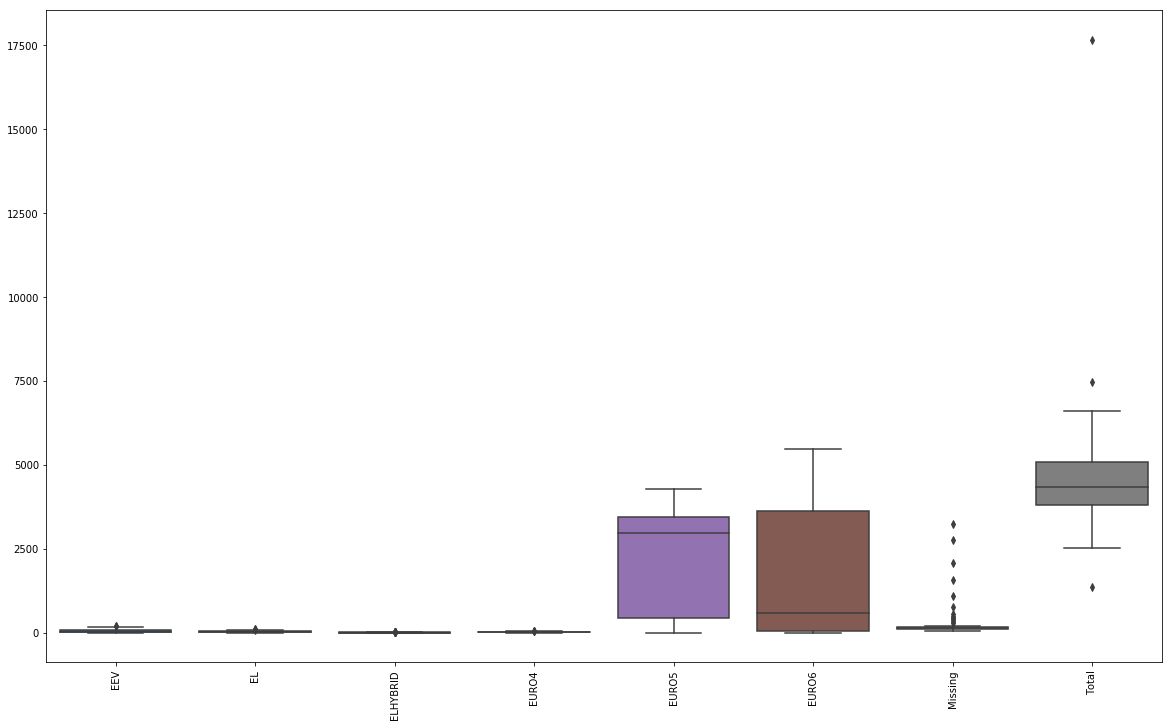

In [340]:
truck_emissionclass_box = truck_emissionclass.drop(['Year','Month'],axis=1)
a4_dims = (20, 12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(data=truck_emissionclass_box,orient='v')
ax.set_xticklabels(['EEV', 'EL','ELHYBRID', 'EURO4', 'EURO5', 'EURO6','Missing', 'Total'],rotation=90)

In [341]:
truck_emissionclass.describe()

,Year,EEV,EL,ELHYBRID,EURO4,EURO5,EURO6,Missing,Total
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,2014.926829,40.548780,32.024390,0.890244,15.158537,2232.463415,1781.073171,269.902439,4577.902439
std,1.980027,56.706337,20.748331,1.617849,10.989860,1509.046851,2020.900739,529.257775,1824.303396
min,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,1368.000000
25%,2013.000000,2.000000,19.250000,0.000000,8.000000,439.750000,54.000000,96.750000,3790.000000
50%,2015.000000,5.500000,28.000000,0.000000,12.000000,2970.000000,593.000000,120.500000,4342.000000
75%,2017.000000,70.000000,41.750000,1.000000,22.000000,3440.500000,3633.250000,154.500000,5075.500000
max,2018.000000,204.000000,111.000000,9.000000,54.000000,4268.000000,5470.000000,3238.000000,17658.000000


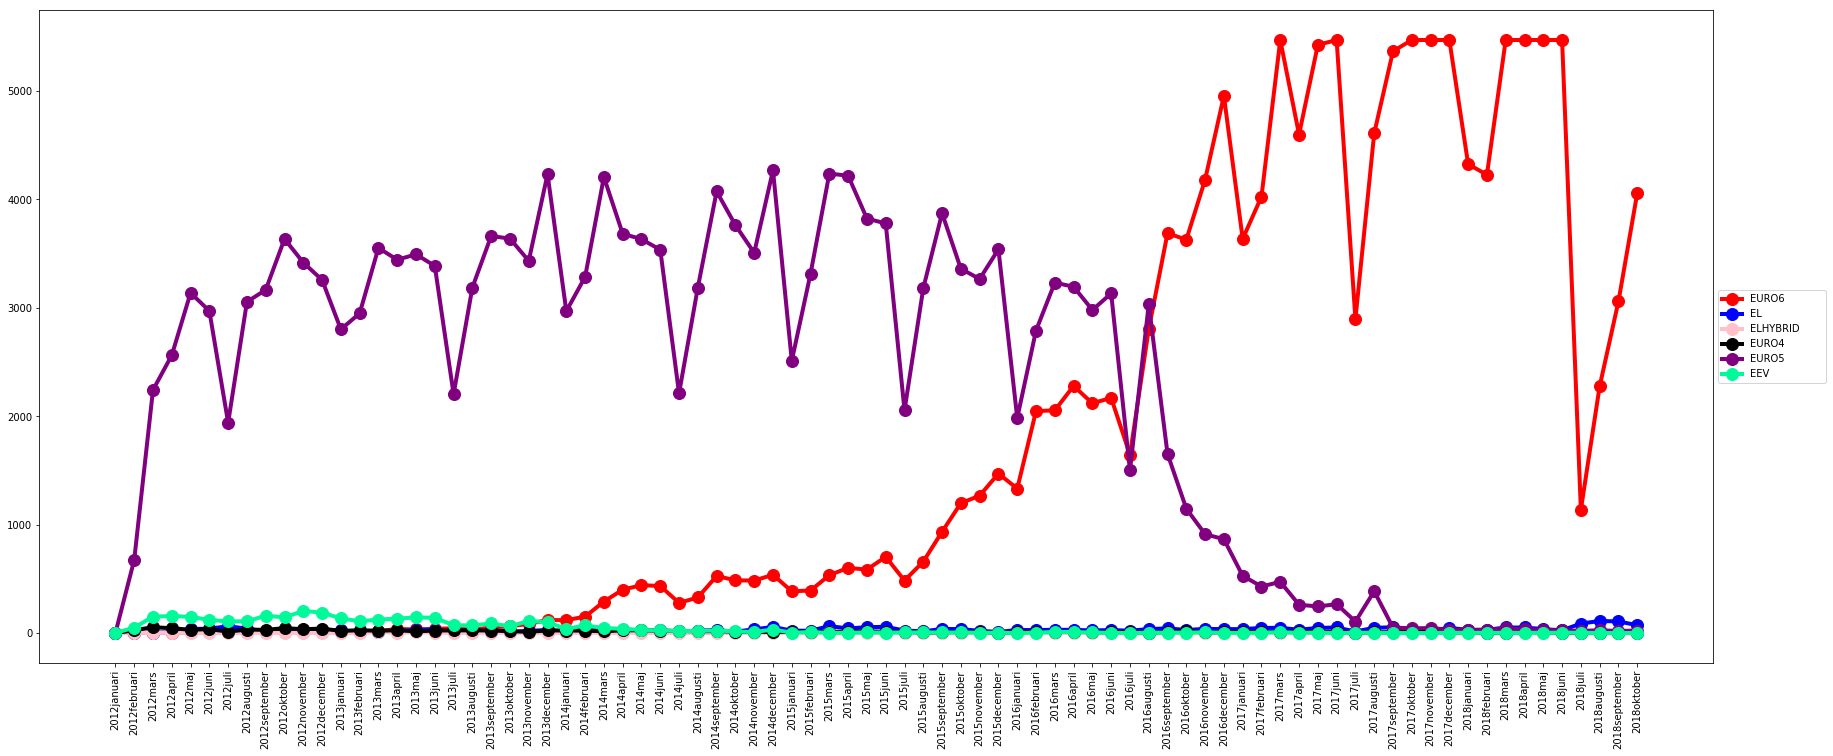

In [342]:
truck_emissionclass['Period'] = truck_emissionclass.Year.astype(str).str.cat(truck_emissionclass.Month)
plt.plot( 'Period', 'EURO6         ', data=truck_emissionclass, marker='o', markerfacecolor='red', markersize=12, color='r', linewidth=4)
plt.plot( 'Period', 'EL             ', data=truck_emissionclass, marker='o', markerfacecolor='blue', markersize=12, color='b', linewidth=4)
plt.plot( 'Period', 'ELHYBRID       ', data=truck_emissionclass, marker='o', markerfacecolor='pink', markersize=12, color='pink', linewidth=4)
plt.plot( 'Period', 'EURO4         ', data=truck_emissionclass, marker='o', markerfacecolor='k', markersize=12, color='k', linewidth=4)
plt.plot( 'Period', 'EURO5         ', data=truck_emissionclass, marker='o', markerfacecolor='purple', markersize=12, color='purple', linewidth=4)
plt.plot( 'Period', 'EEV            ', data=truck_emissionclass, marker='o', markerfacecolor='mediumspringgreen', markersize=12, color='mediumspringgreen', linewidth=4)
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [343]:
truck_emissionclass.to_csv('truck_emissionclass.csv',sep=',')

### Bus

[Text(0,0,'In_use'),
 Text(0,0,'Not_in_use'),
 Text(0,0,'New registrations'),
 Text(0,0,'Deregistrations')]

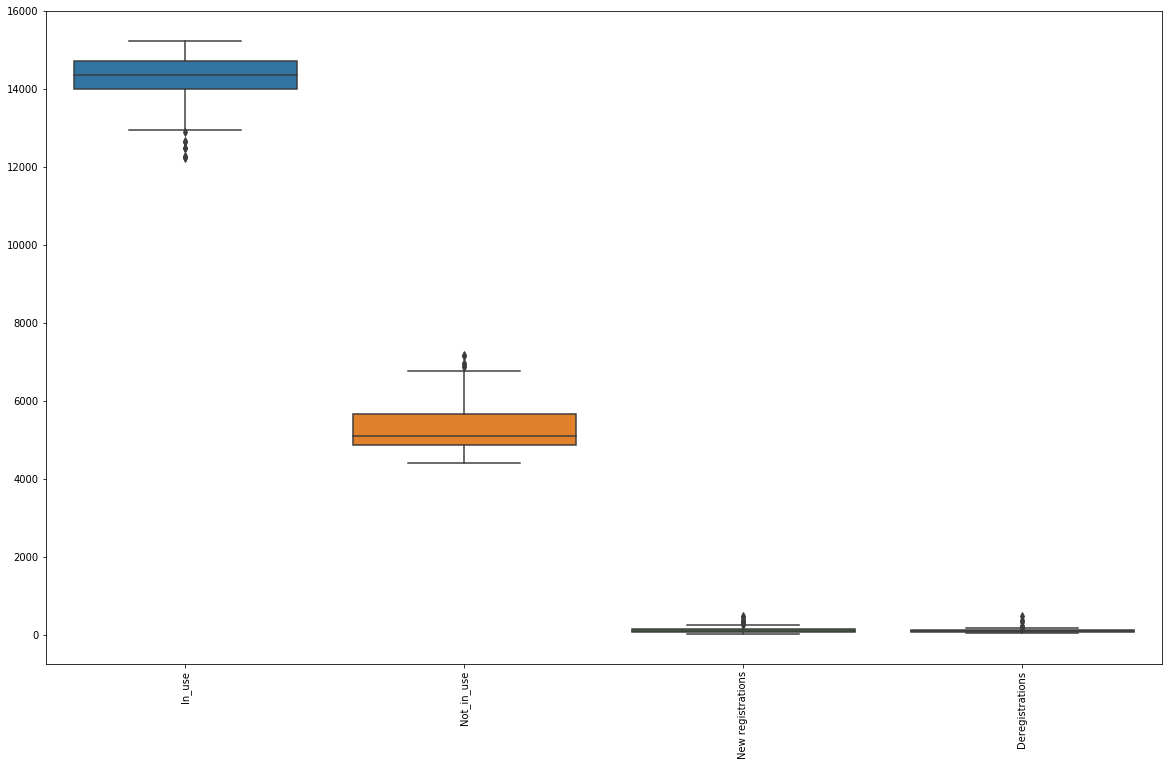

In [55]:
Bus_box = Bus.drop(['Year','Month'],axis=1)
a4_dims = (20, 12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(data=Bus_box,orient='v')
ax.set_xticklabels(['In_use', 'Not_in_use', 'New registrations', 'Deregistrations'],rotation=90)

In [56]:
Bus.describe()

,Year,In_use,Not_in_use,New_registrations,Deregistrations
count,154.000000,154.000000,154.000000,154.000000,154.000000
mean,2011.922078,14244.500000,5329.220779,115.519481,106.090909
std,3.714540,661.657715,628.246041,78.927221,56.162971
min,2006.000000,12236.000000,4410.000000,24.000000,43.000000
25%,2009.000000,14009.750000,4884.250000,65.000000,76.000000
50%,2012.000000,14353.500000,5094.000000,90.500000,92.500000
75%,2015.000000,14723.500000,5672.750000,144.000000,121.750000
max,2018.000000,15232.000000,7182.000000,499.000000,480.000000


The outliers shown in the box plot for the bus dataset could be ignored based on the IQR value verification using 2.2.
The max can be 14723.50 + (14723.50 - 14009.75) * 2.2 = 16293.75. In our case the max is 15232 which is within the range and the minimum can be 14009.75 - (14723.50 - 14009.75) * 2.2 = 12439.5.
The minimum value in our case is a bit lower than the calculated range but the given dataset contains the below condition about the data for busses. Hence there could be a possiblity that the minimum value is out of mathematical IQR limit due to unexpected surge in count during the below period.

1) The increase is due to the fact that in August / September 2013, the Transport Agency conducted a review of canceled vehicles which resulted in more cancellations than normal.

In [222]:
Bus['Period'] = Bus.Year.astype(str).str.cat(Bus.Month)
Bus.drop(['Year','Month'],axis=1, inplace=True)

In [223]:
Bus.to_csv('Bus.csv',sep=',')

### Motor Cycles and Mopeds

###### Doing a quick preview of the dataset we will notice there is a lot of information missing for the year 2006. Hence it is safe to drop all rows of 2006 to get a better understanding of the moped dataset.

Note: According to the Bonus-Malus law, the mopeds and motorcycles must not be affected. But we need to look into these in detail to see if the previous 3 segments were just showing the patterns by chance or if they really did have an impact by the law.

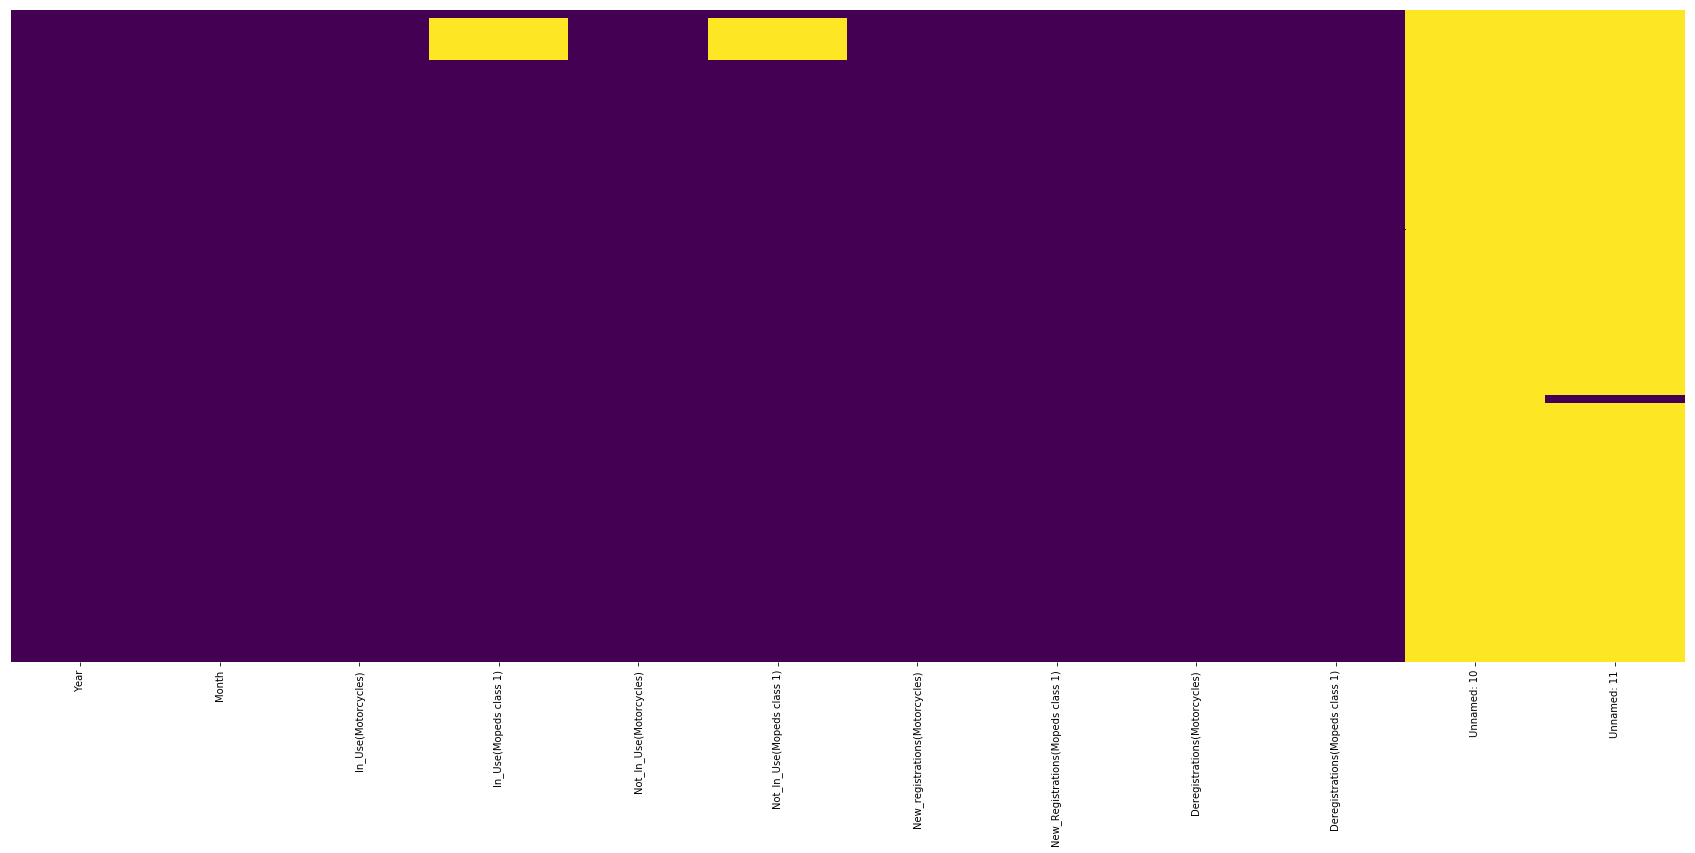

In [62]:
sns.heatmap(MC_Moped.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [74]:
MC_Moped_clean = MC_Moped[MC_Moped['Year']!=2006]
MC_Moped_clean.drop(['Unnamed: 10','Unnamed: 11'],axis=1,inplace=True)
MC_Moped_clean.head()

c:\users\tempsudei\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Year,Month,In_Use(Motorcycles),In_Use(Mopeds class 1),Not_In_Use(Motorcycles),Not_In_Use(Mopeds class 1),New_registrations(Motorcycles),New_Registrations(Mopeds class 1),Deregistrations(Motorcycles),Deregistrations(Mopeds class 1)
12,2007,januari,244052,73295,163879,61212,819,806,268,–
13,2007,februari,243830,72960,164860,62307,874,806,176,–
14,2007,mars,253217,84989,158697,53310,3331,3066,165,–
15,2007,april,269686,100808,146901,42837,4810,5411,219,–
16,2007,maj,280048,110255,140673,38871,4354,5553,345,–


In [75]:
MC_Moped_clean.dtypes

Year                                  int64
Month                                object
In_Use(Motorcycles)                  object
In_Use(Mopeds class 1)               object
Not_In_Use(Motorcycles)              object
Not_In_Use(Mopeds class 1)           object
New_registrations(Motorcycles)        int64
New_Registrations(Mopeds class 1)     int64
Deregistrations(Motorcycles)          int64
Deregistrations(Mopeds class 1)      object
dtype: object

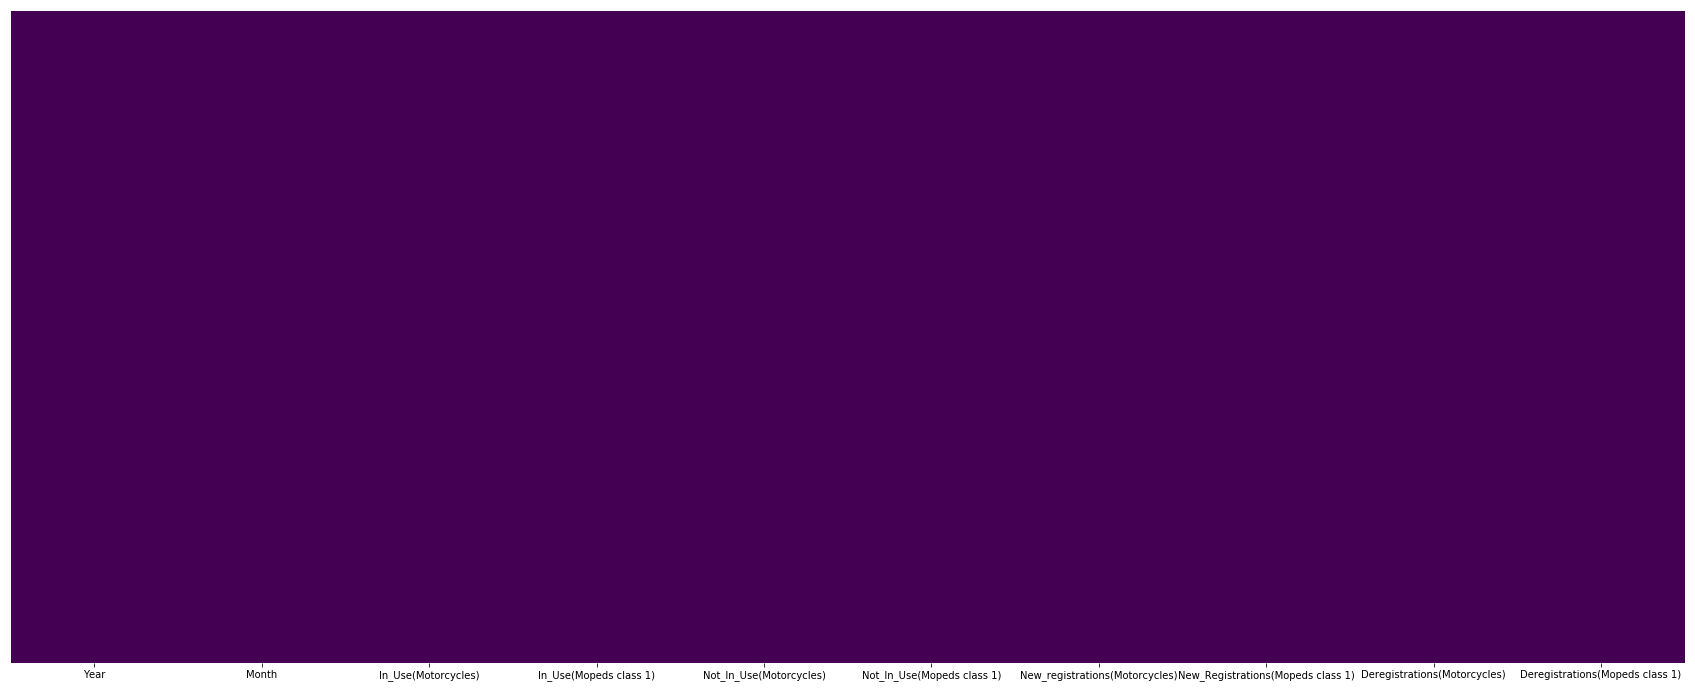

In [76]:
sns.heatmap(MC_Moped_clean.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [79]:
#MC_Moped_clean[MC_Moped_clean['Deregistrations(Mopeds class 1)'] == '–']
MC_Moped_clean.loc[MC_Moped_clean['Deregistrations(Mopeds class 1)'] == '–','Deregistrations(Mopeds class 1)'] = np.nan

c:\users\tempsudei\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [84]:
#MC_Moped_clean[MC_Moped_clean['Deregistrations(Mopeds class 1)'] == '–']
MC_Moped_clean.describe()

,Year,New_registrations(Motorcycles),New_Registrations(Mopeds class 1),Deregistrations(Motorcycles)
count,142.000000,142.000000,142.000000,142.000000
mean,2012.422535,1370.415493,1355.443662,415.408451
std,3.425652,954.762554,1231.486333,325.973570
min,2007.000000,338.000000,100.000000,159.000000
25%,2009.250000,602.250000,453.250000,283.000000
50%,2012.000000,1121.000000,1078.500000,368.000000
75%,2015.000000,1816.500000,1666.500000,473.750000
max,2018.000000,4966.000000,5553.000000,3367.000000


In [97]:
#MC_Moped_clean.isnull()
MC_Moped_clean['Deregistrations(Mopeds class 1)'].fillna(MC_Moped_clean['Deregistrations(Mopeds class 1)'].mean(), inplace=True)
MC_Moped_clean

c:\users\tempsudei\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Year,Month,In_Use(Motorcycles),In_Use(Mopeds class 1),Not_In_Use(Motorcycles),Not_In_Use(Mopeds class 1),New_registrations(Motorcycles),New_Registrations(Mopeds class 1),Deregistrations(Motorcycles),Deregistrations(Mopeds class 1)
12,2007,januari,244052,73295,163879,61212,819,806,268,295.556522
13,2007,februari,243830,72960,164860,62307,874,806,176,295.556522
14,2007,mars,253217,84989,158697,53310,3331,3066,165,295.556522
15,2007,april,269686,100808,146901,42837,4810,5411,219,295.556522
16,2007,maj,280048,110255,140673,38871,4354,5553,345,295.556522
17,2007,juni,286867,117530,137246,36705,3573,5152,282,295.556522
18,2007,juli,289226,121305,137328,37076,2691,4252,425,295.556522
19,2007,augusti,288054,122323,140449,39531,2218,3602,442,295.556522
20,2007,september,280977,117996,148790,46262,1580,2524,515,295.556522
21,2007,oktober,266632,104274,164098,61899,1266,2103,566,295.556522


In [103]:
#MC_Moped_clean[MC_Moped_clean['In_Use(Motorcycles)'] == 'Missing']
MC_Moped_clean.loc[MC_Moped_clean['In_Use(Motorcycles)'] == 'Missing','In_Use(Motorcycles)'] = np.nan
MC_Moped_clean.loc[MC_Moped_clean['In_Use(Mopeds class 1)'] == 'Missing','In_Use(Mopeds class 1)'] = np.nan
MC_Moped_clean.loc[MC_Moped_clean['Not_In_Use(Motorcycles)'] == 'Missing','Not_In_Use(Motorcycles)'] = np.nan
MC_Moped_clean.loc[MC_Moped_clean['Not_In_Use(Mopeds class 1)'] == 'Missing','Not_In_Use(Mopeds class 1)'] = np.nan
MC_Moped_clean['In_Use(Motorcycles)'].fillna(MC_Moped_clean['In_Use(Motorcycles)'].mean(), inplace=True)
MC_Moped_clean['In_Use(Mopeds class 1)'].fillna(MC_Moped_clean['In_Use(Mopeds class 1)'].mean(), inplace=True)
MC_Moped_clean['Not_In_Use(Motorcycles)'].fillna(MC_Moped_clean['Not_In_Use(Motorcycles)'].mean(), inplace=True)
MC_Moped_clean['Not_In_Use(Mopeds class 1)'].fillna(MC_Moped_clean['Not_In_Use(Mopeds class 1)'].mean(), inplace=True)
MC_Moped_clean

c:\users\tempsudei\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
c:\users\tempsudei\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Year,Month,In_Use(Motorcycles),In_Use(Mopeds class 1),Not_In_Use(Motorcycles),Not_In_Use(Mopeds class 1),New_registrations(Motorcycles),New_Registrations(Mopeds class 1),Deregistrations(Motorcycles),Deregistrations(Mopeds class 1)
12,2007,januari,244052,73295.000000,163879.000000,61212.00000,819,806,268,295.556522
13,2007,februari,243830,72960.000000,164860.000000,62307.00000,874,806,176,295.556522
14,2007,mars,253217,84989.000000,158697.000000,53310.00000,3331,3066,165,295.556522
15,2007,april,269686,100808.000000,146901.000000,42837.00000,4810,5411,219,295.556522
16,2007,maj,280048,110255.000000,140673.000000,38871.00000,4354,5553,345,295.556522
17,2007,juni,286867,117530.000000,137246.000000,36705.00000,3573,5152,282,295.556522
18,2007,juli,289226,121305.000000,137328.000000,37076.00000,2691,4252,425,295.556522
19,2007,augusti,288054,122323.000000,140449.000000,39531.00000,2218,3602,442,295.556522
20,2007,september,280977,117996.000000,148790.000000,46262.00000,1580,2524,515,295.556522
21,2007,oktober,266632,104274.000000,164098.000000,61899.00000,1266,2103,566,295.556522


In [105]:
MC_Moped_clean.dtypes

Year                                   int64
Month                                 object
In_Use(Motorcycles)                    int64
In_Use(Mopeds class 1)                 int64
Not_In_Use(Motorcycles)                int64
Not_In_Use(Mopeds class 1)             int64
New_registrations(Motorcycles)         int64
New_Registrations(Mopeds class 1)      int64
Deregistrations(Motorcycles)           int64
Deregistrations(Mopeds class 1)      float64
dtype: object

[Text(0,0,'In_Use(Motorcycles)'),
 Text(0,0,'In_Use(Mopeds class 1)'),
 Text(0,0,'Not_In_Use(Motorcycles)'),
 Text(0,0,'Not_In_Use(Mopeds class 1)'),
 Text(0,0,'New_registrations(Motorcycles)'),
 Text(0,0,'New_Registrations(Mopeds class 1)'),
 Text(0,0,'Deregistrations(Motorcycles)'),
 Text(0,0,'Deregistrations(Mopeds class 1)')]

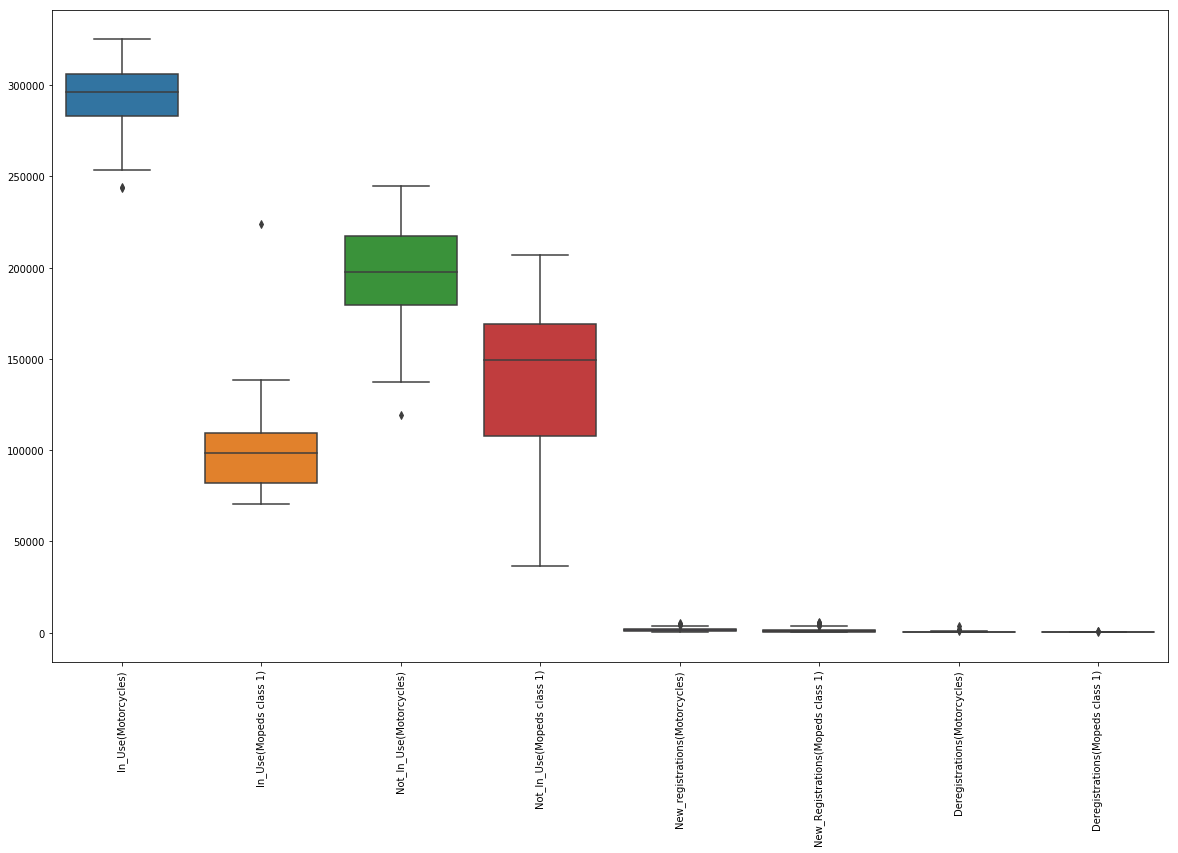

In [106]:
MC_Moped_clean_box = MC_Moped_clean.drop(['Year','Month'],axis=1)
a4_dims = (20, 12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(data=MC_Moped_clean_box,orient='v')
ax.set_xticklabels(['In_Use(Motorcycles)', 'In_Use(Mopeds class 1)', 'Not_In_Use(Motorcycles)', 'Not_In_Use(Mopeds class 1)','New_registrations(Motorcycles)','New_Registrations(Mopeds class 1)','Deregistrations(Motorcycles)','Deregistrations(Mopeds class 1)'],rotation=90)

In [173]:
MC_Moped_clean.describe()

,Year,In_Use(Motorcycles),In_Use(Mopeds class 1),Not_In_Use(Motorcycles),Not_In_Use(Mopeds class 1),New_registrations(Motorcycles),New_Registrations(Mopeds class 1),Deregistrations(Motorcycles),Deregistrations(Mopeds class 1)
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2012.422535,294680.542254,97278.654930,197822.309859,136103.866197,1370.415493,1355.443662,415.408451,295.556522
std,3.425652,15809.697870,17489.708002,25495.777752,43050.296915,954.762554,1231.486333,325.973570,110.980171
min,2007.000000,253217.000000,70448.000000,137328.000000,36705.000000,338.000000,100.000000,159.000000,79.000000
25%,2009.250000,283776.250000,82033.750000,180288.250000,107749.250000,602.250000,453.250000,283.000000,217.750000
50%,2012.000000,296108.000000,98205.500000,197519.500000,149488.500000,1121.000000,1078.500000,368.000000,295.556522
75%,2015.000000,306018.000000,108849.500000,217542.750000,169013.000000,1816.500000,1666.500000,473.750000,343.000000
max,2018.000000,325038.000000,137893.000000,244909.000000,206620.000000,4966.000000,5553.000000,3367.000000,800.000000


In [167]:
MC_Moped_clean['In_Use(Motorcycles)'].quantile(q=0.01)
MC_Moped_clean['In_Use(Mopeds class 1)'].quantile(q=0.99)
MC_Moped_clean['Not_In_Use(Motorcycles)'].quantile(q=0.01)

The cell above contains the commands used to fetch the lowest and highest quantiles of the respective columns where we find very huge outliers. We substitute those values with the mean of the dataset. 

In [168]:
MC_Moped_clean.loc[MC_Moped_clean['In_Use(Motorcycles)'] < 247809.65, 'In_Use(Motorcycles)'] = 293975
MC_Moped_clean.loc[MC_Moped_clean['In_Use(Mopeds class 1)'] > 138124.28, 'In_Use(Mopeds class 1)'] = 98442
MC_Moped_clean.loc[MC_Moped_clean['Not_In_Use(Motorcycles)'] < 137279.62, 'Not_In_Use(Motorcycles)'] = 196856

c:\users\tempsudei\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


[Text(0,0,'In_Use(Motorcycles)'),
 Text(0,0,'In_Use(Mopeds class 1)'),
 Text(0,0,'Not_In_Use(Motorcycles)'),
 Text(0,0,'Not_In_Use(Mopeds class 1)'),
 Text(0,0,'New_registrations(Motorcycles)'),
 Text(0,0,'New_Registrations(Mopeds class 1)'),
 Text(0,0,'Deregistrations(Motorcycles)'),
 Text(0,0,'Deregistrations(Mopeds class 1)')]

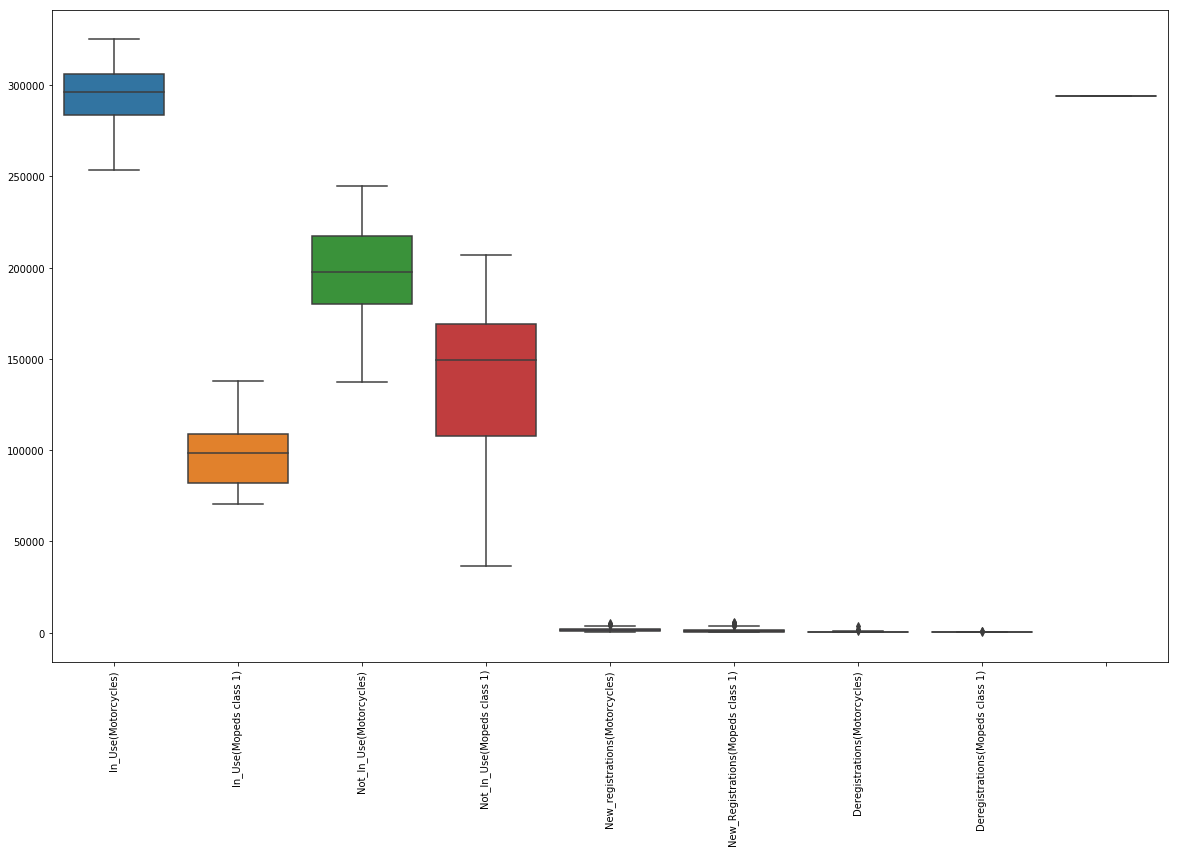

In [169]:
MC_Moped_clean_box = MC_Moped_clean.drop(['Year','Month'],axis=1)
a4_dims = (20, 12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(data=MC_Moped_clean_box,orient='v')
ax.set_xticklabels(['In_Use(Motorcycles)', 'In_Use(Mopeds class 1)', 'Not_In_Use(Motorcycles)', 'Not_In_Use(Mopeds class 1)','New_registrations(Motorcycles)','New_Registrations(Mopeds class 1)','Deregistrations(Motorcycles)','Deregistrations(Mopeds class 1)'],rotation=90)

Now we see the boxplot comes out cleaner. The values of the moped and motorcycle dataset can now be analysed to see any specific patterns. 

In [175]:
MC_Moped_clean.reset_index(inplace=True)

In [192]:
MC_Moped_clean.drop('index',axis=1,inplace=True)
MC_Moped_clean = MC_Moped_clean.round(2)

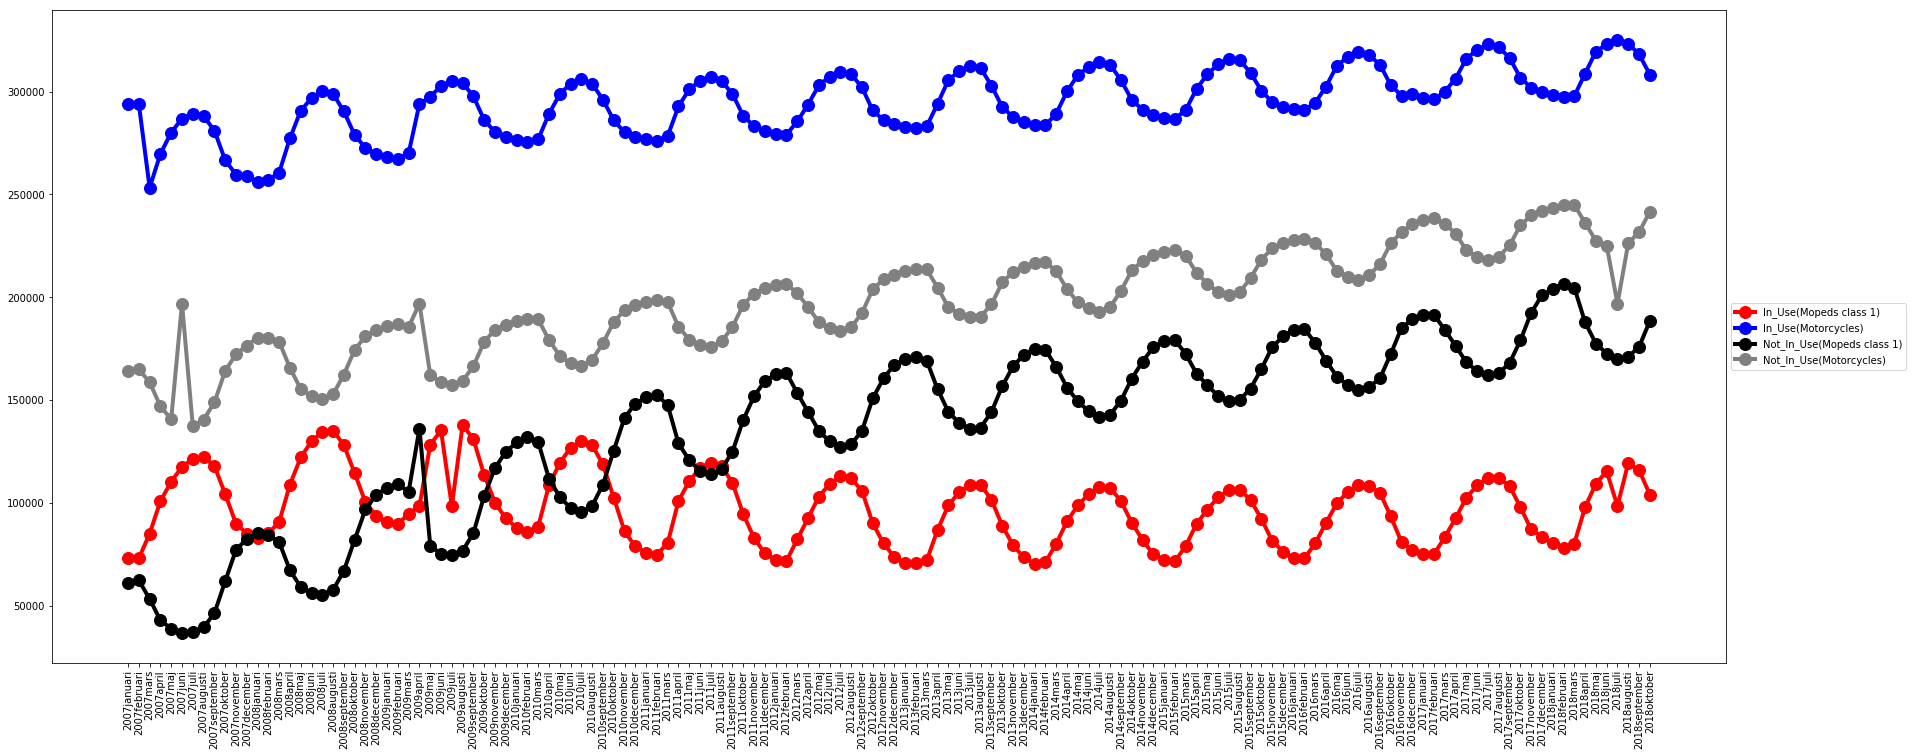

In [282]:
MC_Moped_clean['Period'] = MC_Moped_clean.Year.astype(str).str.cat(MC_Moped_clean.Month)
plt.plot( 'Period', 'In_Use(Mopeds class 1)', data=MC_Moped_clean, marker='o', markerfacecolor='red', markersize=12, color='r', linewidth=4)
plt.plot( 'Period', 'In_Use(Motorcycles)', data=MC_Moped_clean, marker='o', markerfacecolor='blue', markersize=12, color='b', linewidth=4)
plt.plot( 'Period', 'Not_In_Use(Mopeds class 1)', data=MC_Moped_clean, marker='o', markerfacecolor='k', markersize=12, color='k', linewidth=4)
plt.plot( 'Period', 'Not_In_Use(Motorcycles)', data=MC_Moped_clean, marker='o', markerfacecolor='grey', markersize=12, color='grey', linewidth=4)
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [283]:
MC_Moped_clean.to_csv('Moped_Motorcycle_trafikanalysis.csv',sep=',')

### Traktor

In [284]:
Traktor.describe()

,Year,In_use,Not_in_use,New_registrations,Deregistrations
count,154.000000,154.000000,154.000000,154.000000,154.000000
mean,2011.922078,325080.889610,113259.454545,446.571429,144.668831
std,3.714540,4296.543679,13570.871338,201.593062,38.394249
min,2006.000000,319469.000000,88436.000000,203.000000,77.000000
25%,2009.000000,321624.500000,103362.750000,321.250000,117.000000
50%,2012.000000,324305.500000,114684.000000,408.500000,141.000000
75%,2015.000000,326802.500000,123645.750000,492.750000,167.750000
max,2018.000000,336955.000000,136447.000000,2045.000000,254.000000


[Text(0,0,'In_use'),
 Text(0,0,'Not_In_Use'),
 Text(0,0,'New_registrations'),
 Text(0,0,'Deregistrations')]

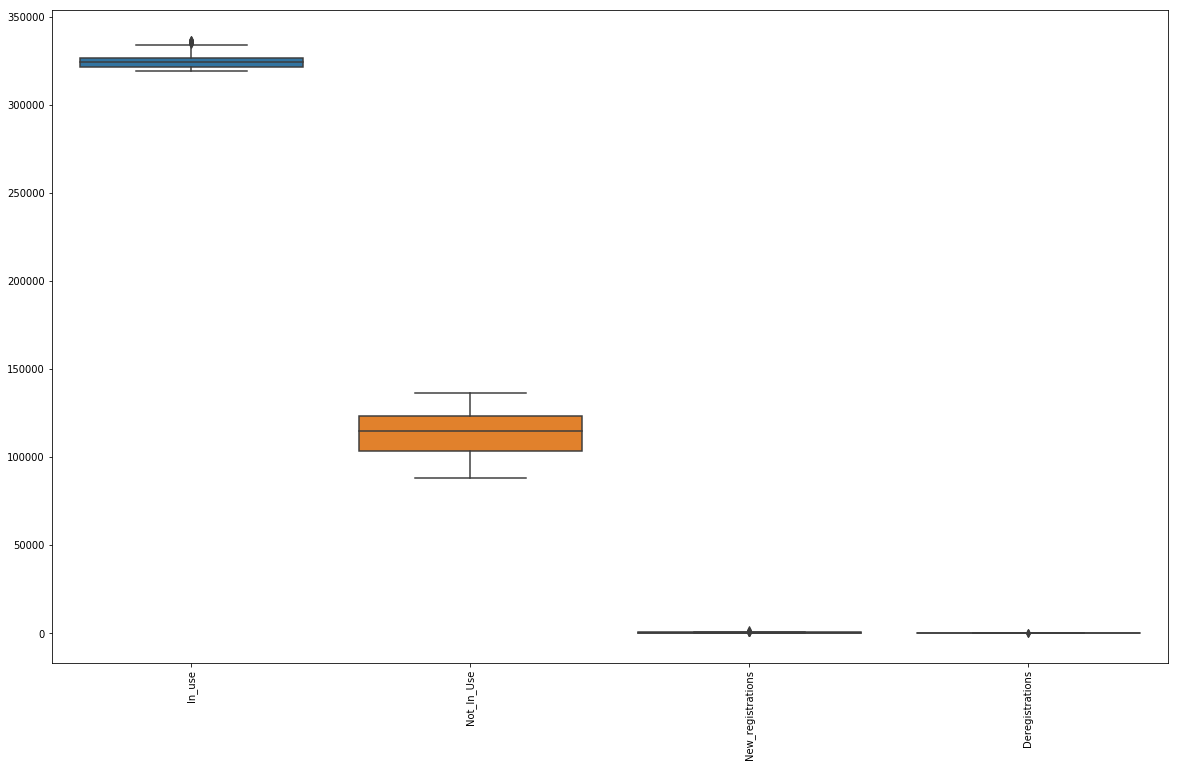

In [285]:
Traktor_box = Traktor.drop(['Year','Month'],axis=1)
a4_dims = (20, 12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(data=Traktor_box,orient='v')
ax.set_xticklabels(['In_use', 'Not_In_Use','New_registrations','Deregistrations'],rotation=90)

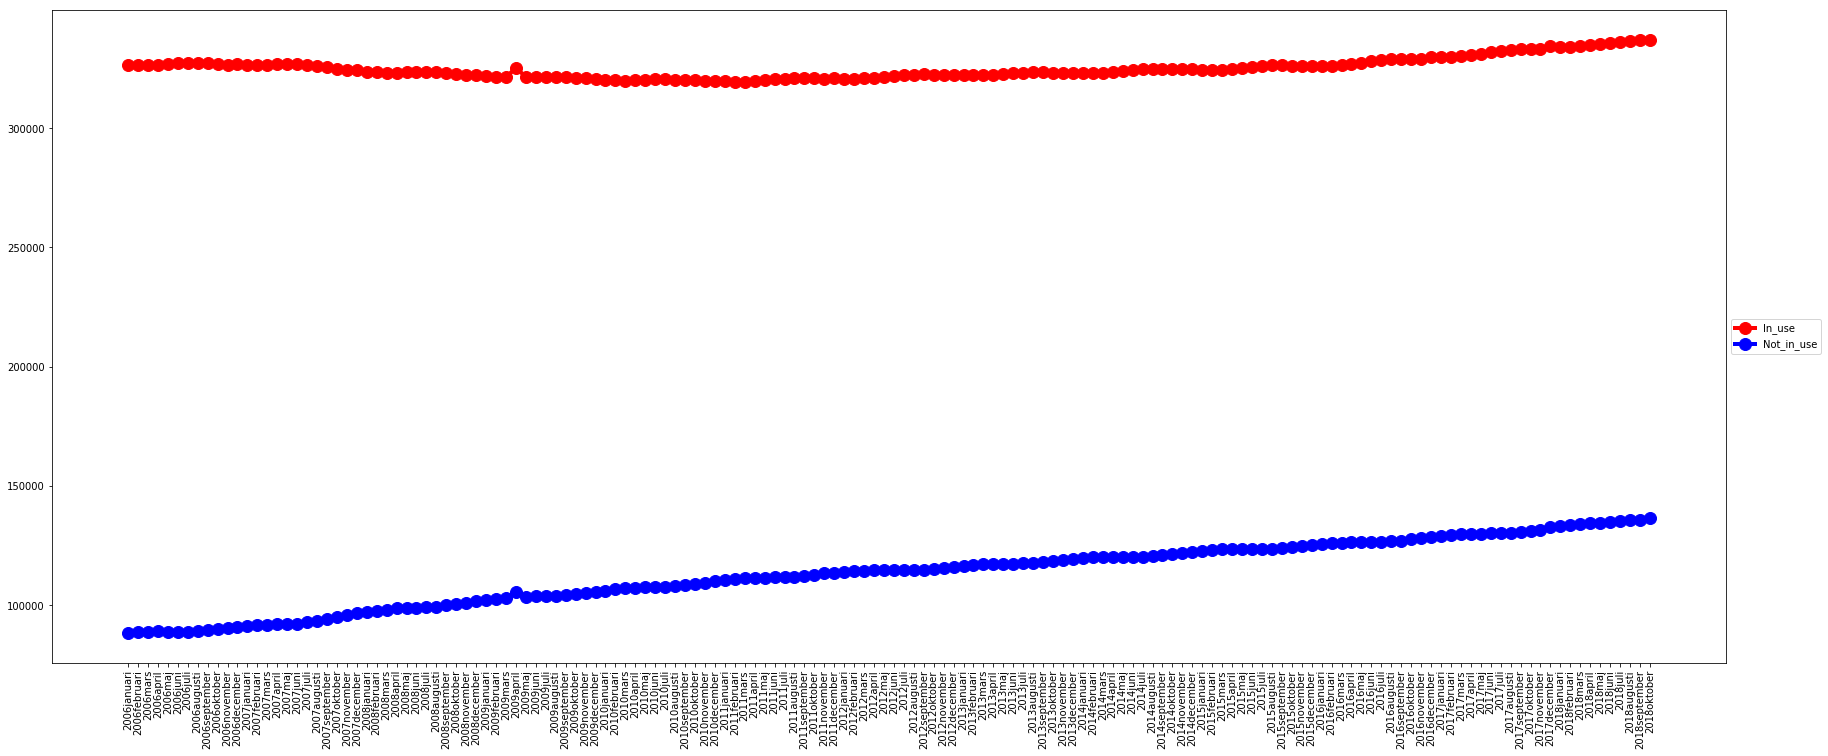

In [290]:
Traktor['Period'] = Traktor.Year.astype(str).str.cat(Traktor.Month)
plt.plot( 'Period', 'In_use', data=Traktor, marker='o', markerfacecolor='red', markersize=12, color='r', linewidth=4)
plt.plot( 'Period', 'Not_in_use', data=Traktor, marker='o', markerfacecolor='blue', markersize=12, color='b', linewidth=4)
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

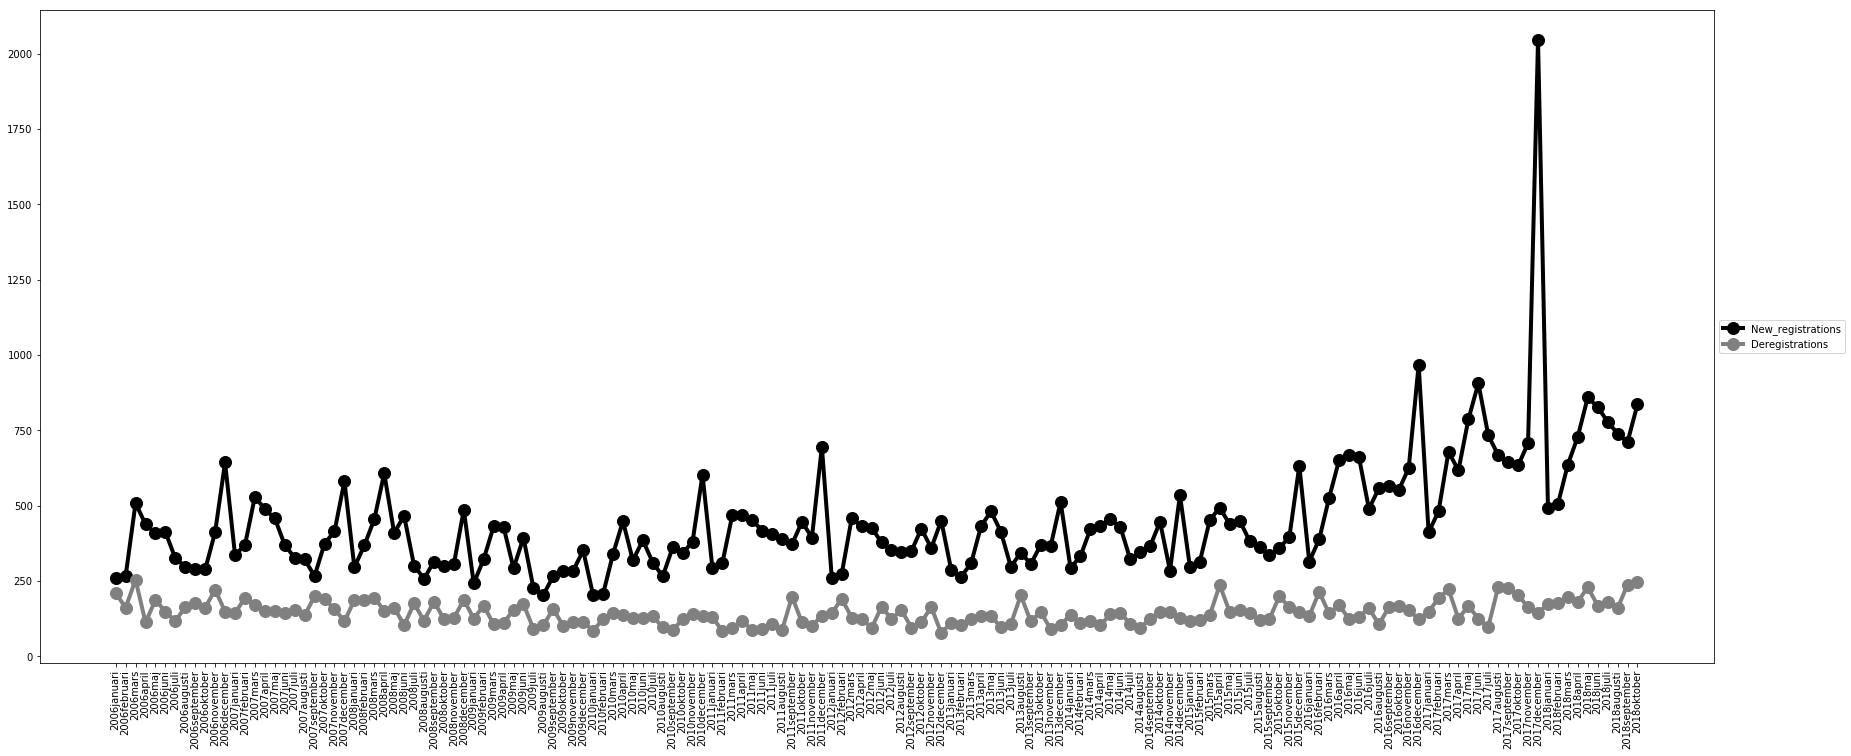

In [289]:
plt.plot( 'Period', 'New_registrations', data=Traktor, marker='o', markerfacecolor='k', markersize=12, color='k', linewidth=4)
plt.plot( 'Period', 'Deregistrations', data=Traktor, marker='o', markerfacecolor='grey', markersize=12, color='grey', linewidth=4)
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [291]:
Traktor.to_csv('Traktor.csv',sep=',')

### Trailer

In [292]:
Trailer.describe()

,Year,In_use,Not_in_use,New registrations(Caravans),New registrations(Trailers excl Caravans),Deregistration
count,154.000000,1.540000e+02,154.000000,154.000000,154.000000,154.000000
mean,2011.922078,1.006905e+06,223535.487013,393.051948,3491.863636,946.993506
std,3.714540,9.633065e+04,27622.816198,278.282942,1293.309006,204.533728
min,2006.000000,8.344860e+05,173218.000000,44.000000,1166.000000,590.000000
25%,2009.000000,9.287778e+05,201511.500000,149.500000,2360.500000,830.250000
50%,2012.000000,1.001772e+06,224578.000000,333.500000,3509.500000,919.500000
75%,2015.000000,1.087199e+06,246174.000000,567.000000,4289.750000,1028.750000
max,2018.000000,1.195021e+06,271464.000000,1222.000000,6886.000000,2337.000000


[Text(0,0,'In_use'),
 Text(0,0,'Not_In_Use'),
 Text(0,0,'New_registrations(Caravans)'),
 Text(0,0,'New registrations(Trailers excl Caravans)'),
 Text(0,0,'Deregistration')]

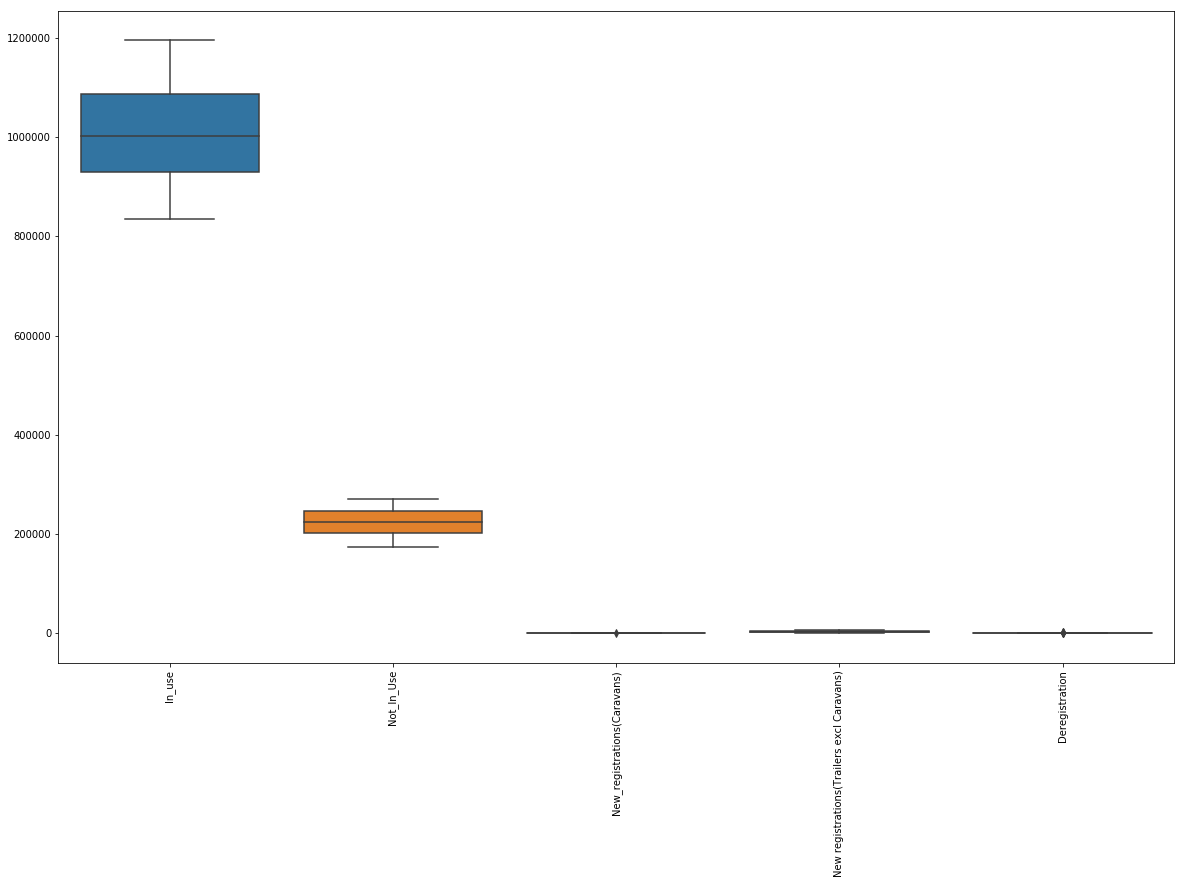

In [298]:
Trailer_box = Trailer.drop(['Year','Month'],axis=1)
a4_dims = (20, 12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(data=Trailer_box,orient='v')
ax.set_xticklabels(['In_use', 'Not_In_Use','New_registrations(Caravans)','New registrations(Trailers excl Caravans)','Deregistration'],rotation=90)

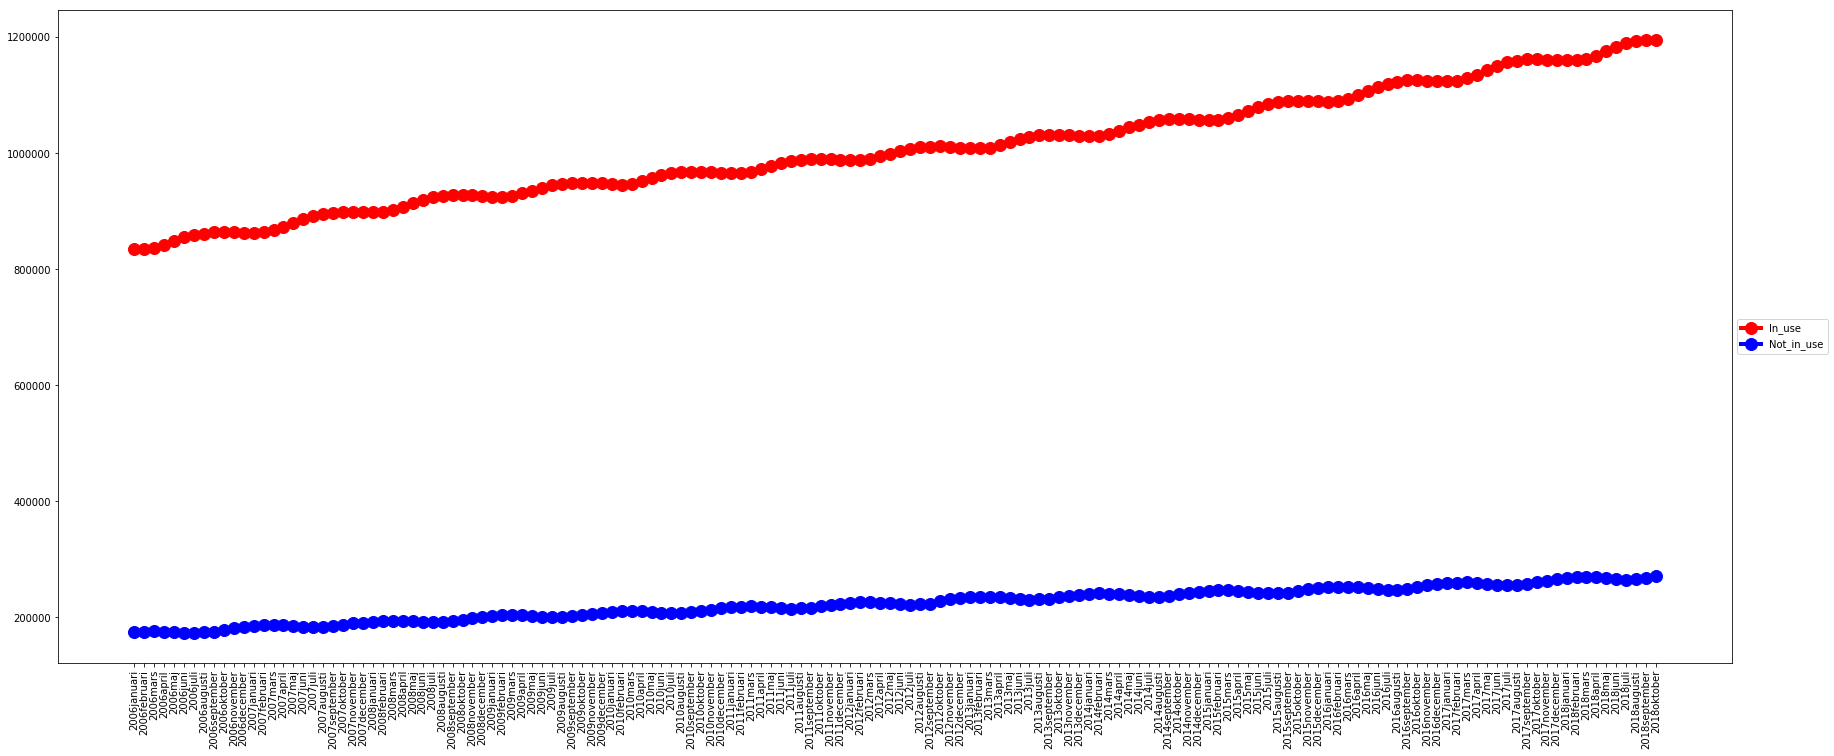

In [294]:
Trailer['Period'] = Trailer.Year.astype(str).str.cat(Trailer.Month)
plt.plot( 'Period', 'In_use', data=Trailer, marker='o', markerfacecolor='red', markersize=12, color='r', linewidth=4)
plt.plot( 'Period', 'Not_in_use', data=Trailer, marker='o', markerfacecolor='blue', markersize=12, color='b', linewidth=4)
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

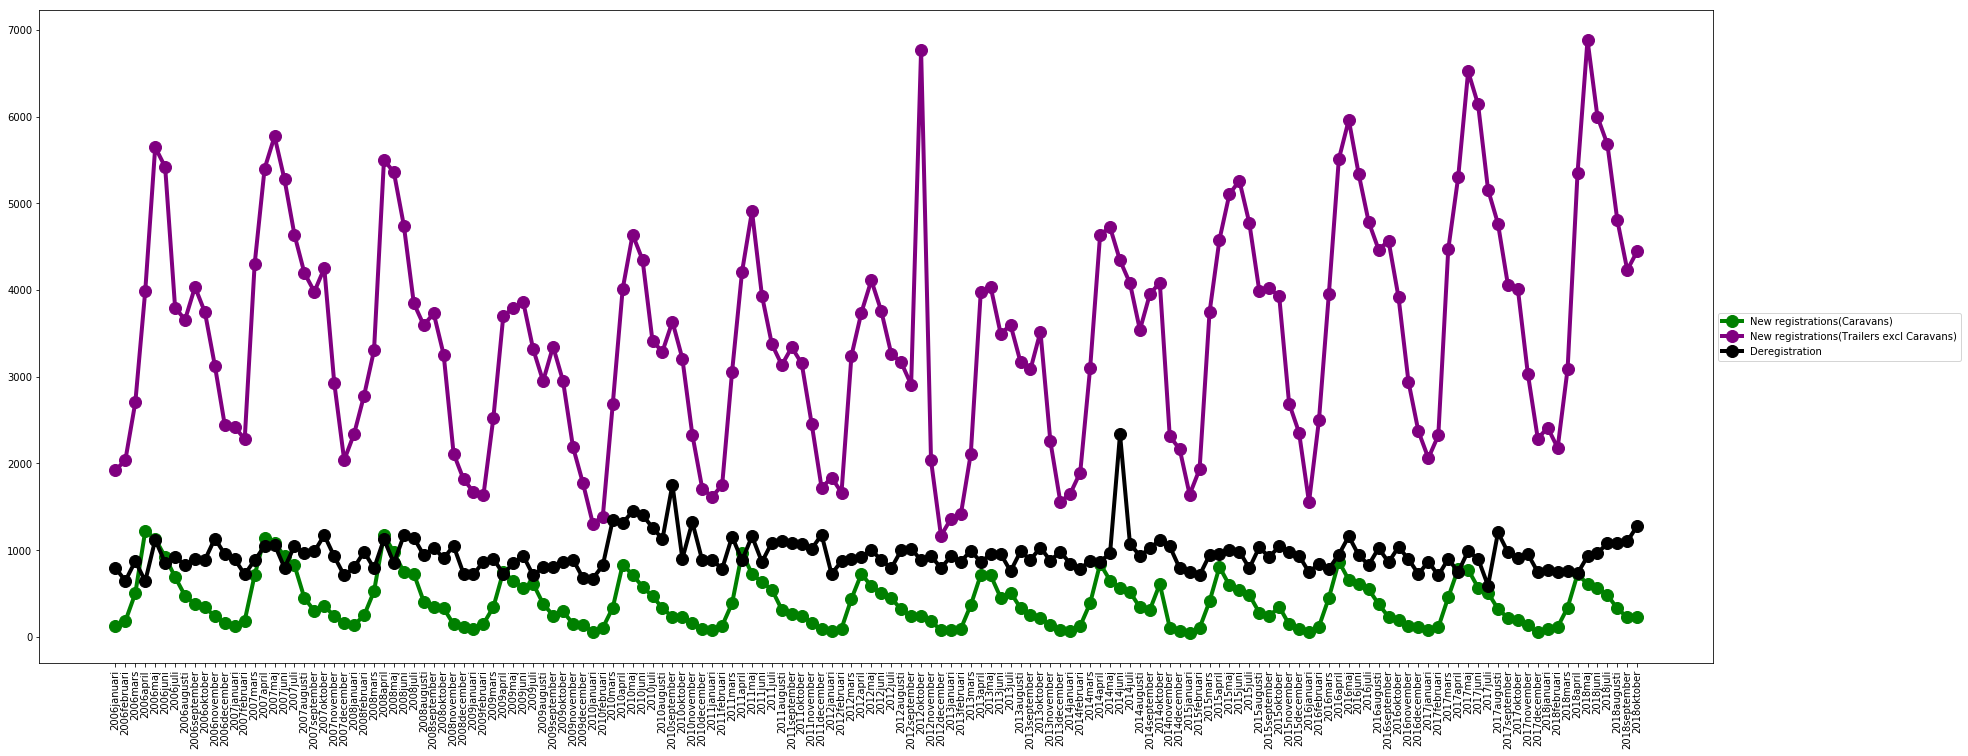

In [300]:
plt.plot( 'Period', 'New registrations(Caravans)', data=Trailer, marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4)
plt.plot( 'Period', 'New registrations(Trailers excl Caravans)', data=Trailer, marker='o', markerfacecolor='purple', markersize=12, color='purple', linewidth=4)
plt.plot( 'Period', 'Deregistration', data=Trailer, marker='o', markerfacecolor='k', markersize=12, color='k', linewidth=4)
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [326]:
Trailer_year = Trailer.groupby('Year').agg('sum')

In [328]:
Trailer.to_csv('Trailer.csv',sep=',')
Trailer_year.to_csv('Trailer_year.csv',sep=',')

### Terrain Scooters

In [301]:
Terrain_scooters.describe()

,Year,In use,Not in use,Deregistrations
count,154.000000,154.000000,154.000000,154.000000
mean,2011.922078,229260.974026,141995.298701,145.493506
std,3.714540,36341.148310,15744.057620,56.354416
min,2006.000000,171860.000000,103623.000000,58.000000
25%,2009.000000,197603.500000,132118.500000,107.000000
50%,2012.000000,228890.000000,139195.500000,133.000000
75%,2015.000000,260057.250000,155172.500000,162.750000
max,2018.000000,295332.000000,173604.000000,405.000000


In [305]:
#Terrain_scooters[Terrain_scooters['New Registrations(ATV)'] == '..']
#Terrain_scooters[Terrain_scooters['New Registrations(Snowmobile)'] == '..']
Terrain_scooters.loc[Terrain_scooters['New Registrations(ATV)'] == '..','New Registrations(ATV)'] = np.nan
Terrain_scooters.loc[Terrain_scooters['New Registrations(Snowmobile)'] == '..','New Registrations(Snowmobile)'] = np.nan

In [307]:
Terrain_scooters['New Registrations(ATV)'].fillna(Terrain_scooters['New Registrations(ATV)'].mean(), inplace=True)
Terrain_scooters['New Registrations(Snowmobile)'].fillna(Terrain_scooters['New Registrations(Snowmobile)'].mean(), inplace=True)

[Text(0,0,'In_use'),
 Text(0,0,'Not_In_Use'),
 Text(0,0,'New Registrations(ATV)'),
 Text(0,0,'New Registrations(Snowmobile)'),
 Text(0,0,'Deregistration')]

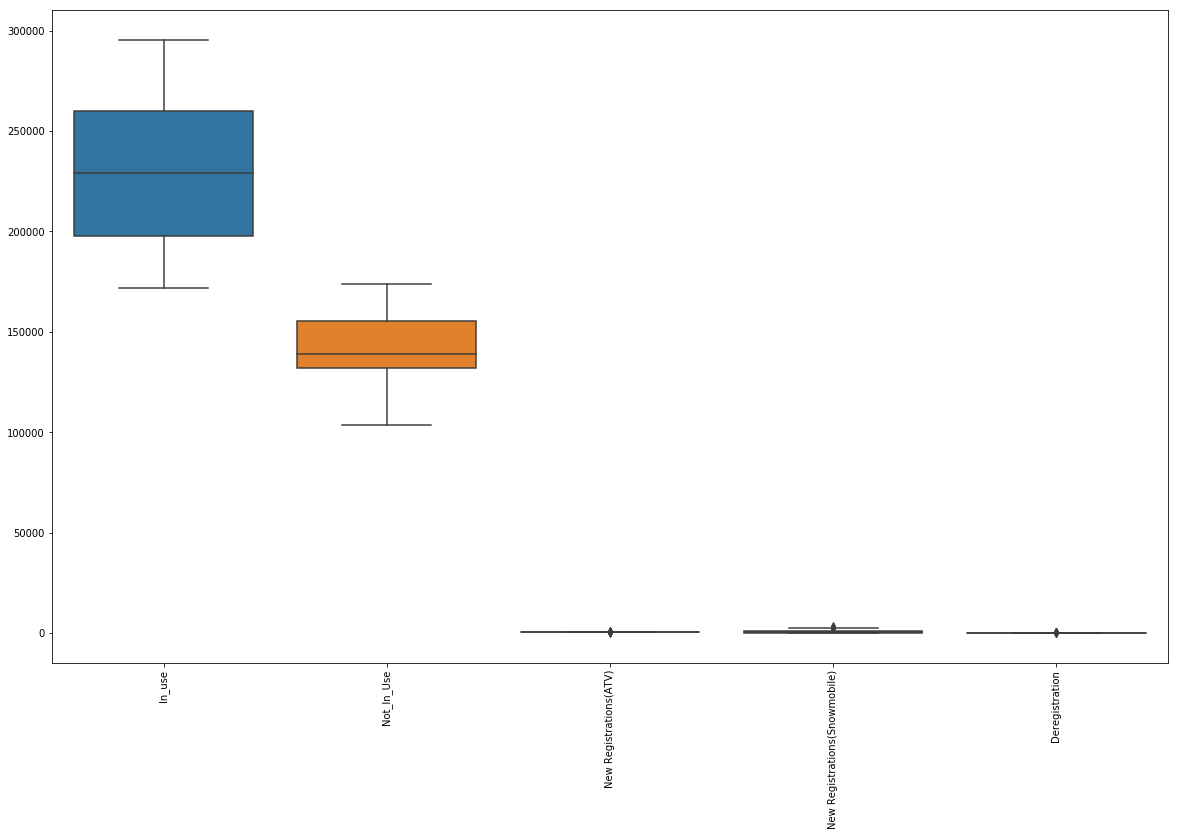

In [310]:
Terrain_scooters_box = Terrain_scooters.drop(['Year','Month'],axis=1)
a4_dims = (20, 12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(data=Terrain_scooters_box,orient='v')
ax.set_xticklabels(['In_use', 'Not_In_Use','New Registrations(ATV)','New Registrations(Snowmobile)','Deregistration'],rotation=90)

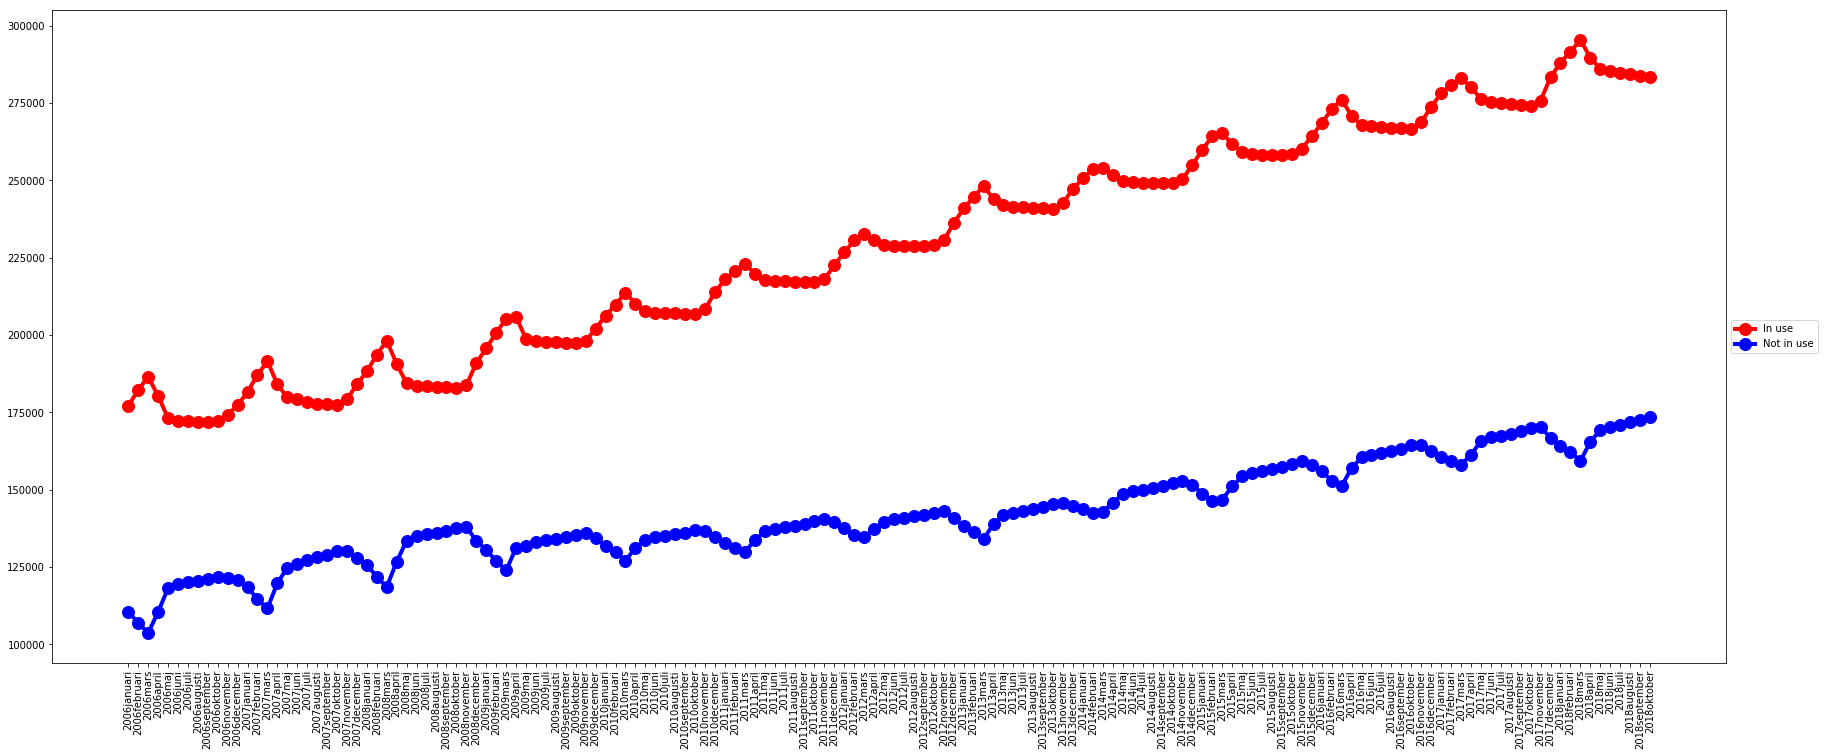

In [321]:
Terrain_scooters['Period'] = Terrain_scooters.Year.astype(str).str.cat(Terrain_scooters.Month)
plt.plot( 'Period', 'In use', data=Terrain_scooters, marker='o', markerfacecolor='red', markersize=12, color='r', linewidth=4)
plt.plot( 'Period', 'Not in use', data=Terrain_scooters, marker='o', markerfacecolor='blue', markersize=12, color='b', linewidth=4)
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [324]:
Terrain_scooters_year = Terrain_scooters.groupby('Year').agg('sum')

In [329]:
Terrain_scooters.to_csv('Terrainscooters.csv',sep=',')
Terrain_scooters_year.to_csv('Terrainscooters_year.csv',sep=',')